In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "camel"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 109
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel       0           1   0.600000  0.096774  0.166667  0.728383   
1   camel       0           2   0.666667  0.100000  0.173913  0.692083   
2   camel       0           3   0.600000  0.130435  0.214286  0.809506   
3   camel       0           4   0.000000  0.000000  0.000000  0.756325   
4   camel       0           5   0.000000  0.000000  0.000000  0.696806   

      gmean        ap   specifi model  
0  0.309239  0.361436  0.988166  base  
1  0.315348  0.308088  0.994444  base  
2  0.359111  0.461393  0.988701  base  
3  0.000000  0.234002  0.971751  base  
4  0.000000  0.215616  0.983333  base

In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.563636  0.596154  0.579439  0.805159   
1   camel      15          17   0.403846  0.525000  0.456522  0.746641   
2   camel      15          18   0.473684  0.720000  0.571429  0.784400   
3   camel      15          19   0.482143  0.627907  0.545455  0.797734   
4   camel      15          20   0.415385  0.551020  0.473684  0.744695   

      gmean        ap   specifi      model  
0  0.706739  0.604146  0.837838  ecoselekt  
1  0.650601  0.429273  0.806250  ecoselekt  
2  0.726636  0.598162  0.733333  ecoselekt  
3  0.715489  0.509676  0.815287  ecoselekt  
4  0.642147  0.473732  0.748344  ecoselekt

In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   1.000000  0.557692  0.716049  0.982328   
1   camel      15          17   0.954545  0.525000  0.677419  0.979062   
2   camel      15          18   1.000000  0.660000  0.795181  0.983933   
3   camel      15          19   1.000000  0.534884  0.696970  0.973634   
4   camel      15          20   1.000000  0.551020  0.710526  0.974186   

      gmean        ap  specifi model  
0  0.746788  0.959823  1.00000  best  
1  0.722301  0.914636  0.99375  best  
2  0.812404  0.959090  1.00000  best  
3  0.731357  0.920388  1.00000  best  
4  0.742307  0.934463  1.00000  best

(8742, 11)


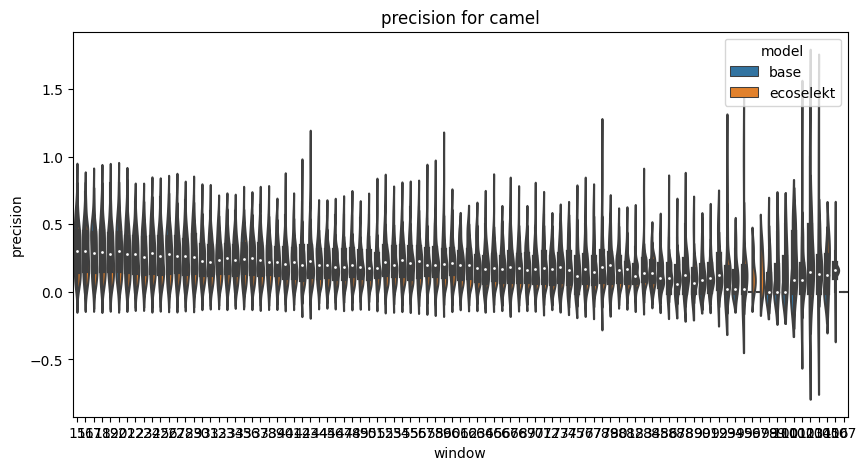

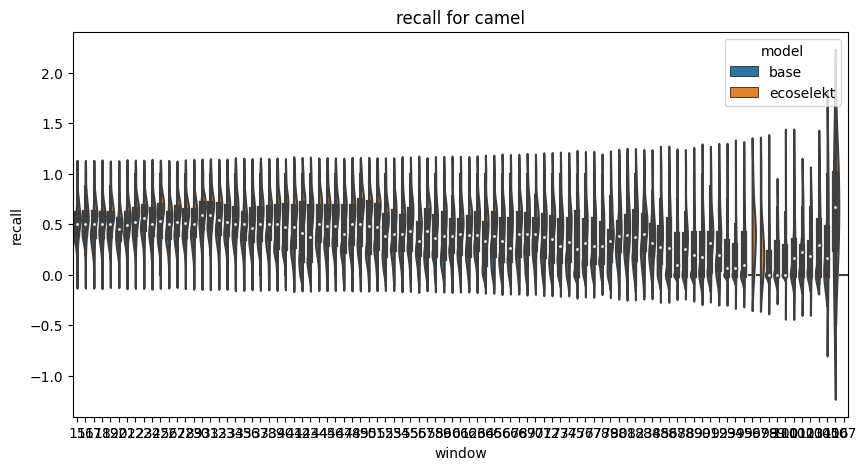

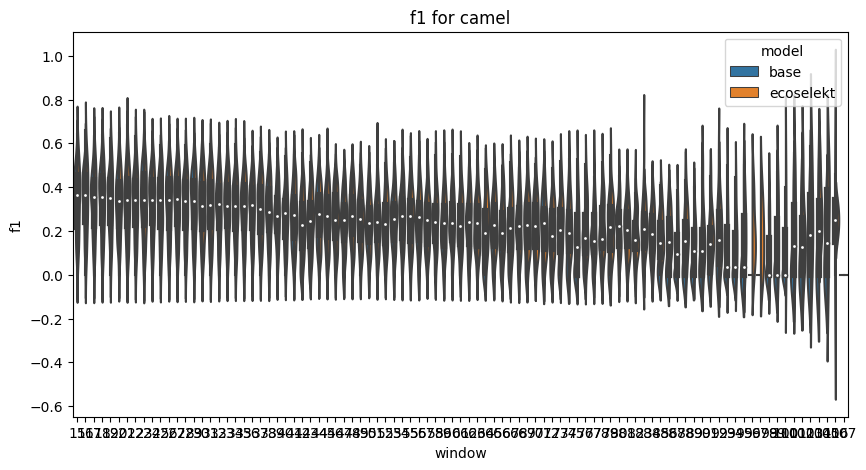

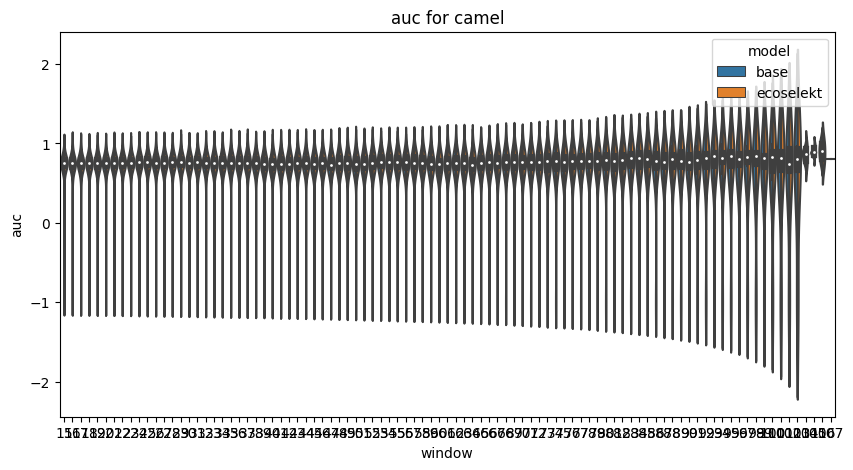

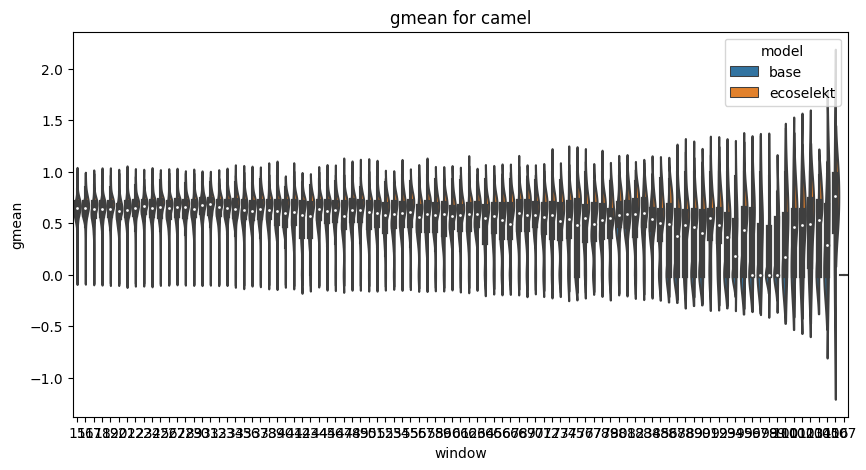

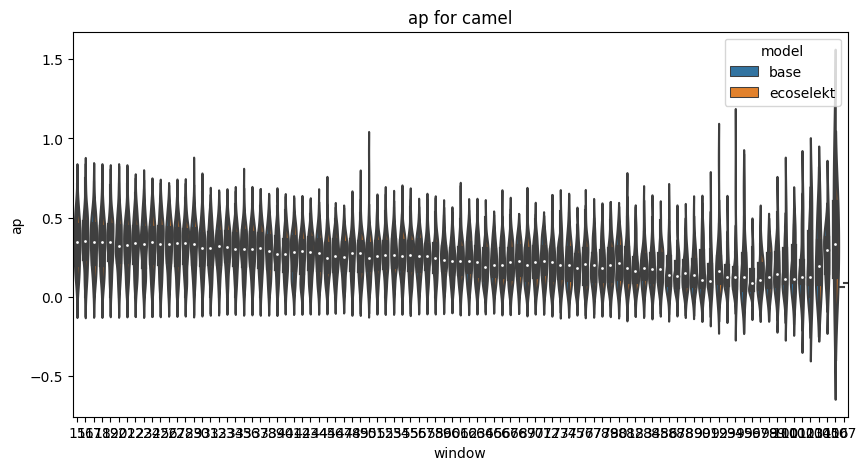

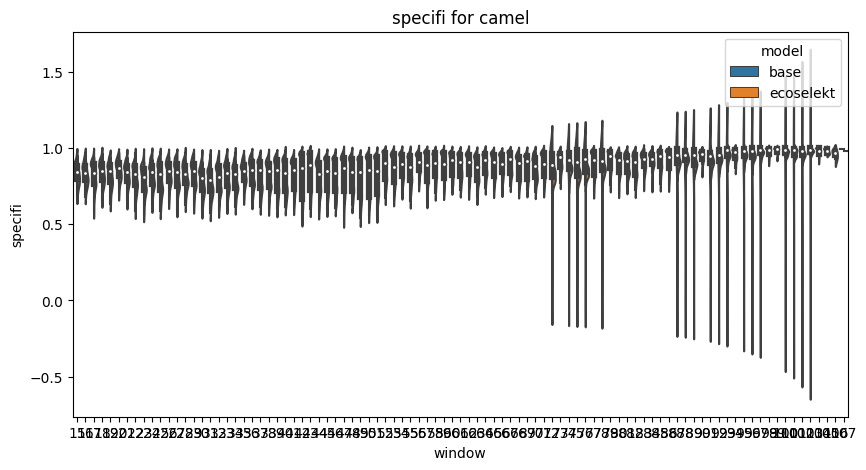

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


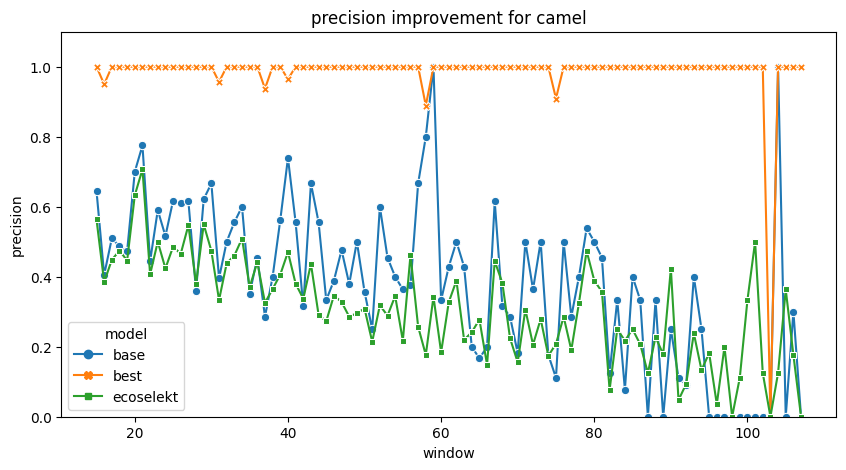

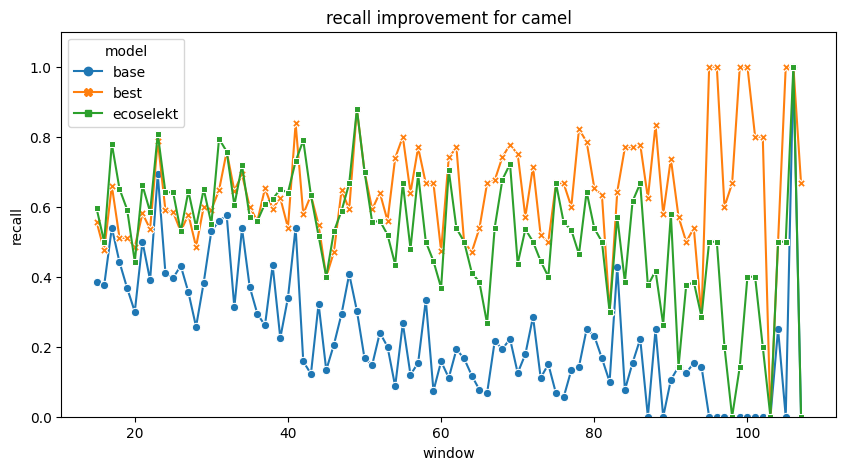

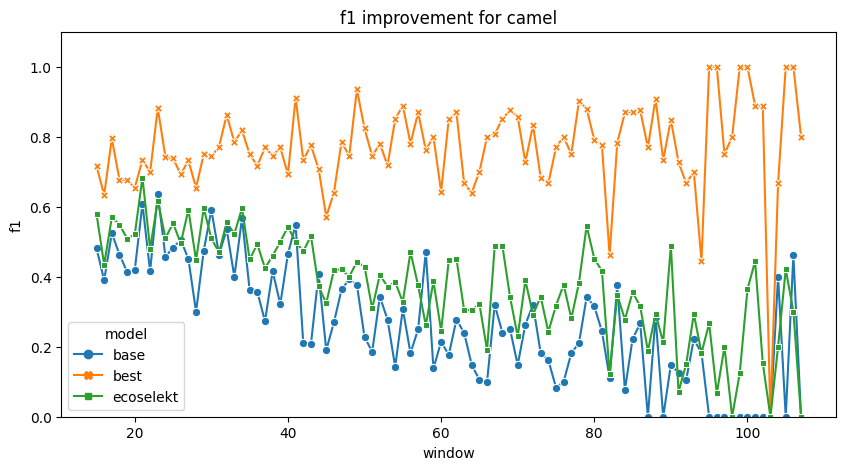

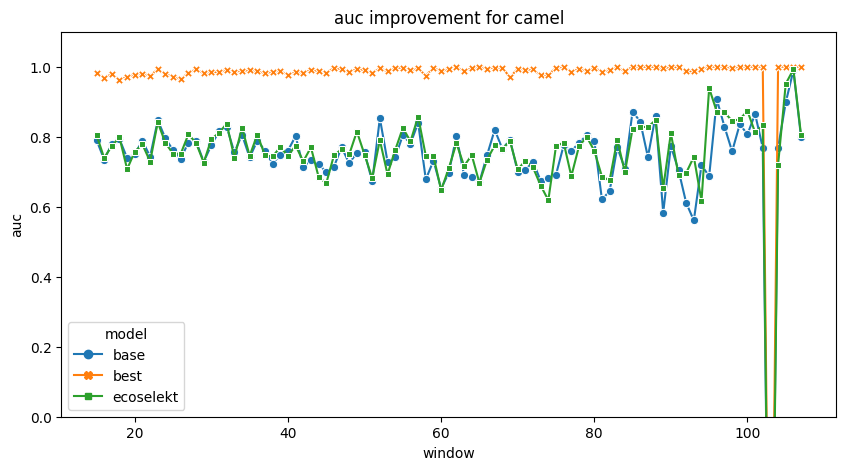

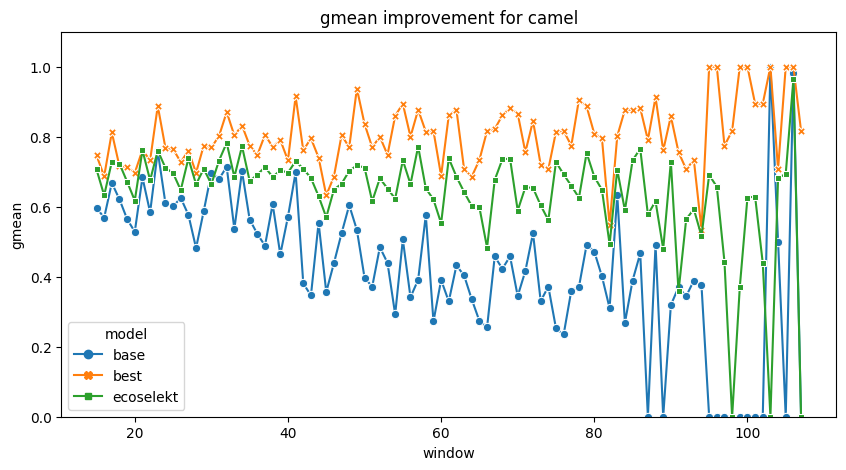

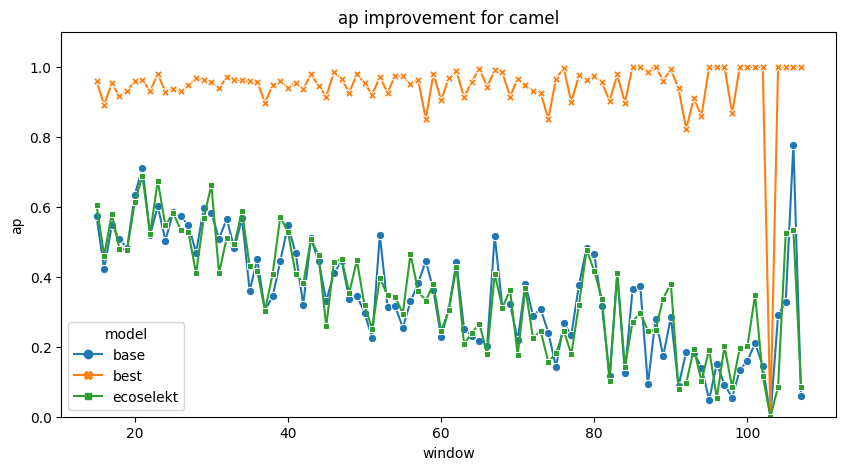

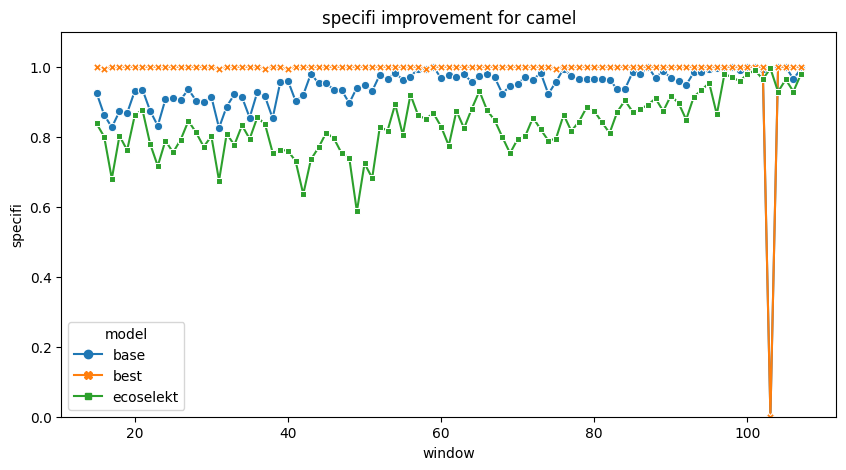

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

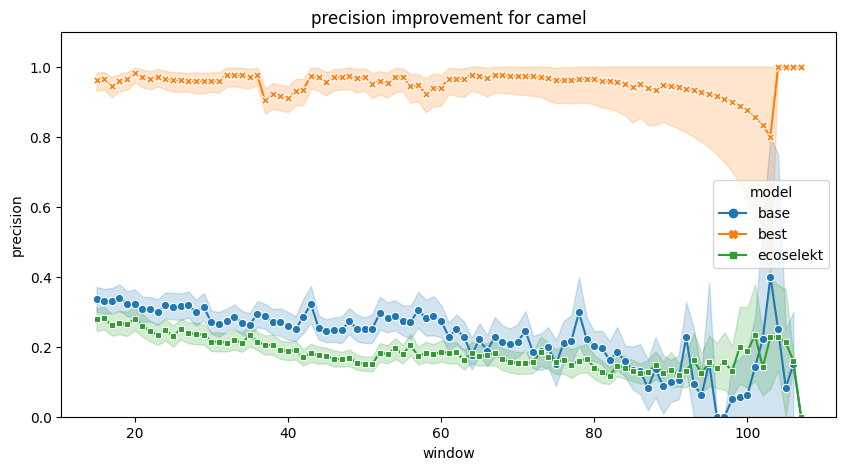

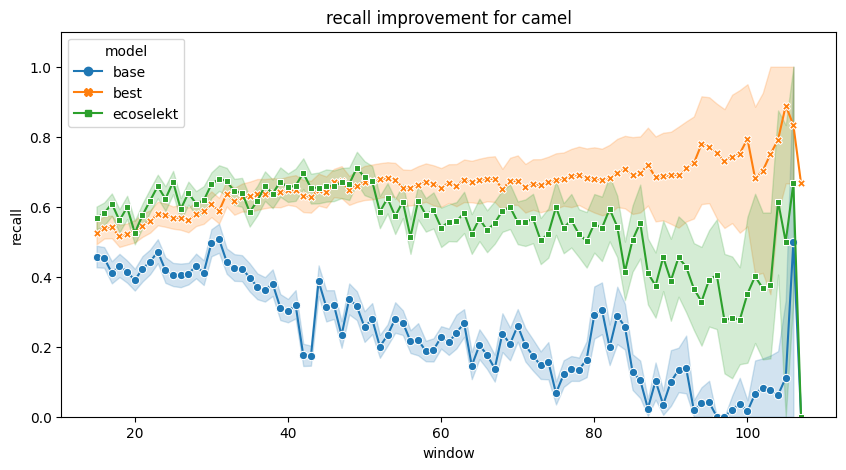

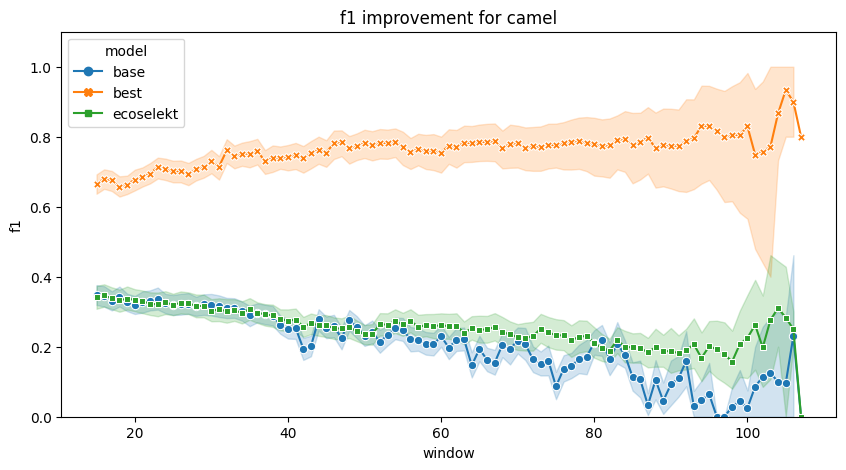

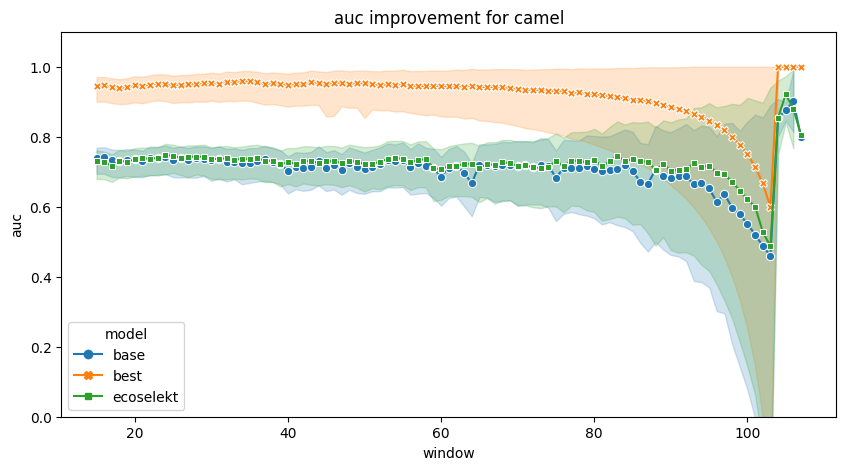

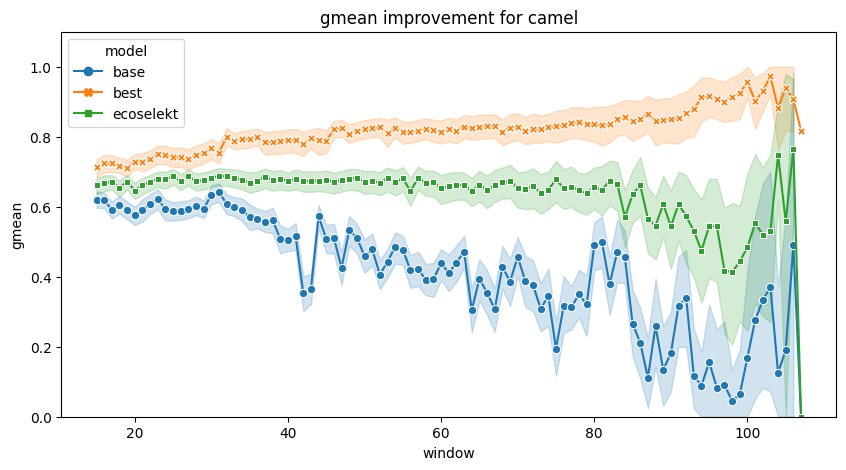

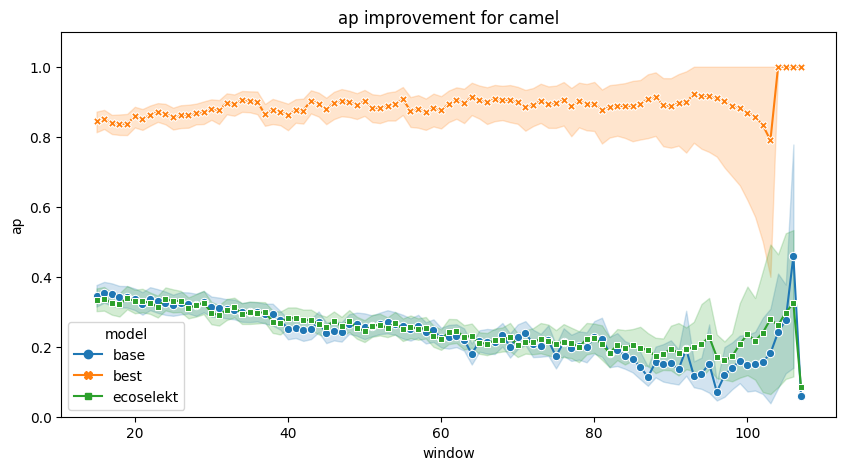

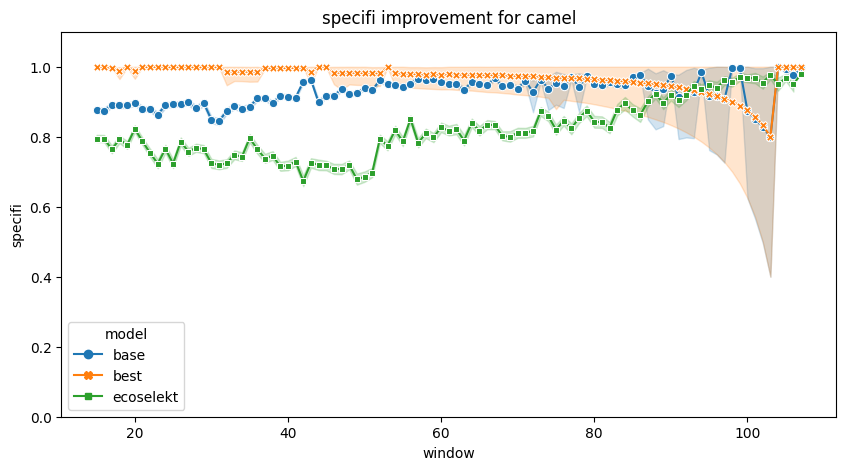

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.10359941652883395
Wilcoxon test significance: False


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 3.7203375128475654e-16
Wilcoxon test significance: True


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(874200, 4)


commit_id  window  test_split  model_version
0  4a27afd941bec6ba9ab51682e34d116a81f4b670      15          16              0
1  493335c7cc4ecf38dcbe5ad84c1f456e8e99c341      15          16              0
2  2aad5f3c7620f6e39548d037ac8f51f54e02b38b      15          16              1
3  28d23d2e9f7f01cf08682187396b836a99662552      15          16              7
4  d5e8e0e2b84862019ecb5ec1ca95a503f40a63d4      15          16              1

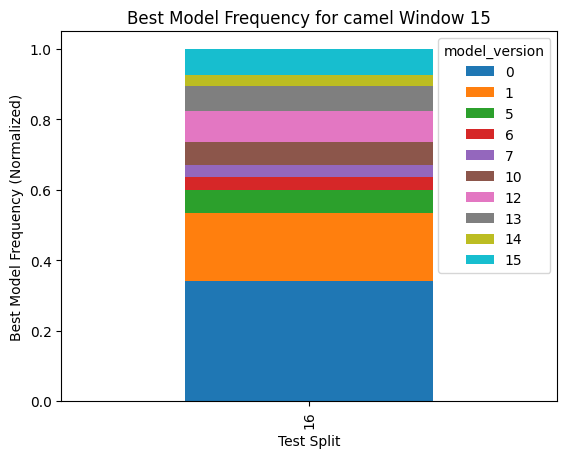

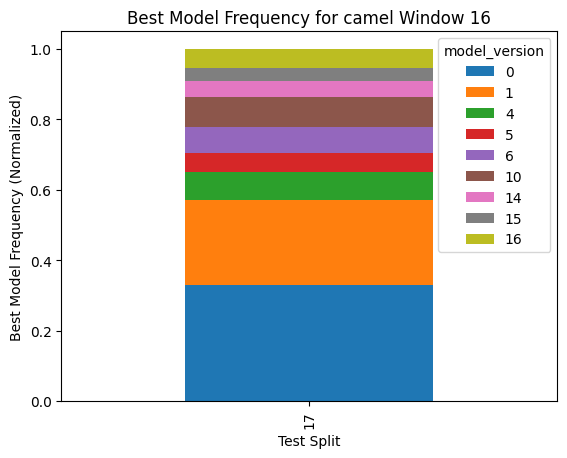

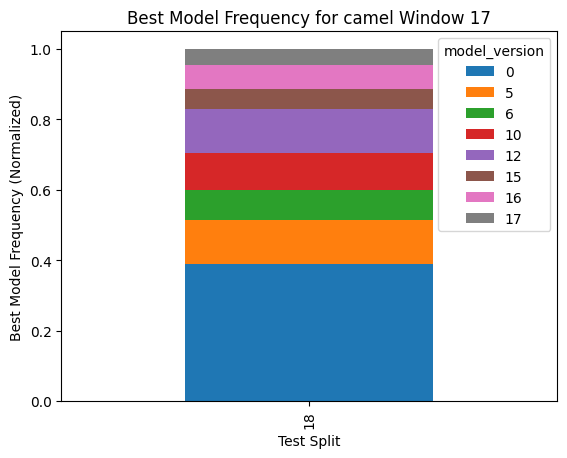

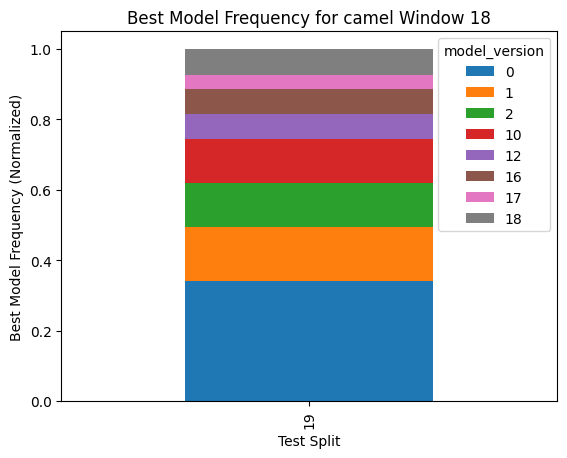

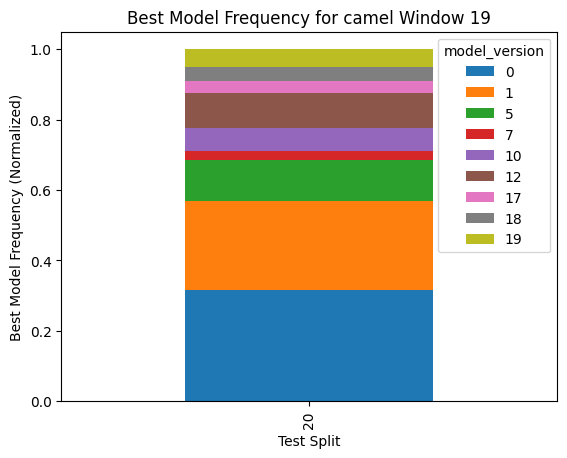

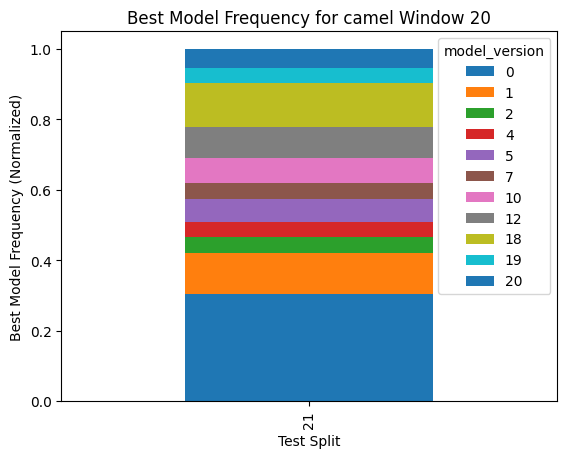

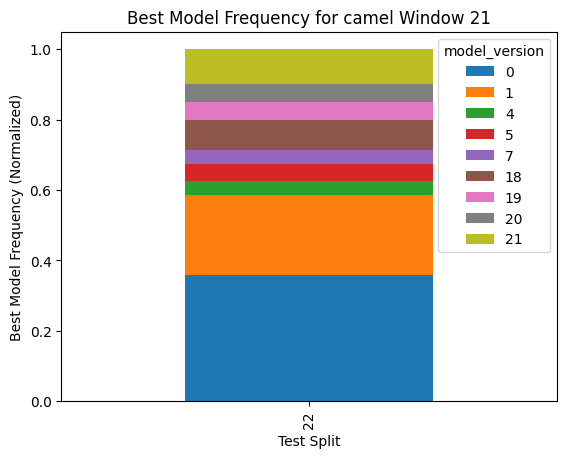

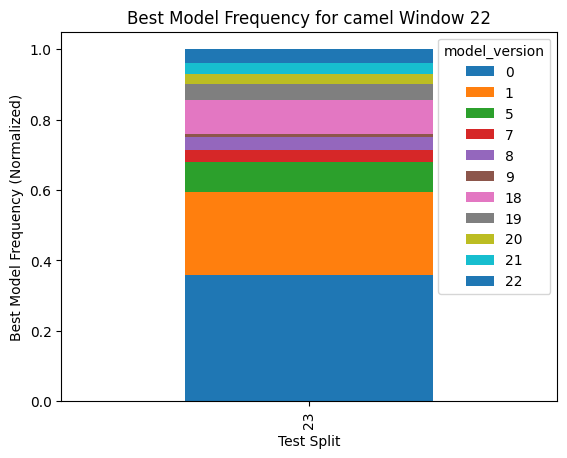

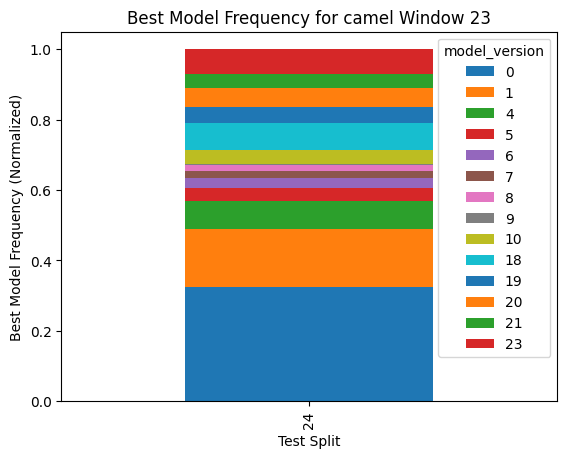

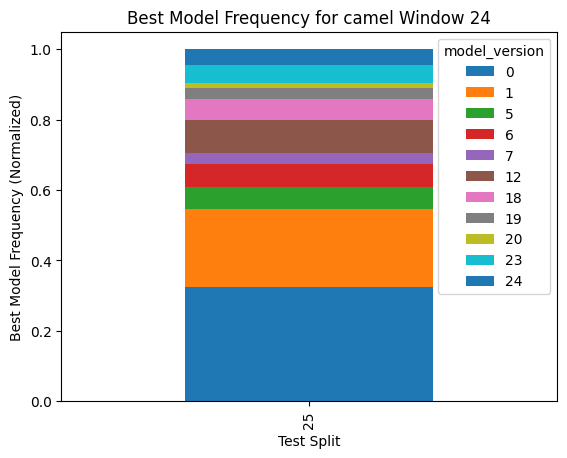

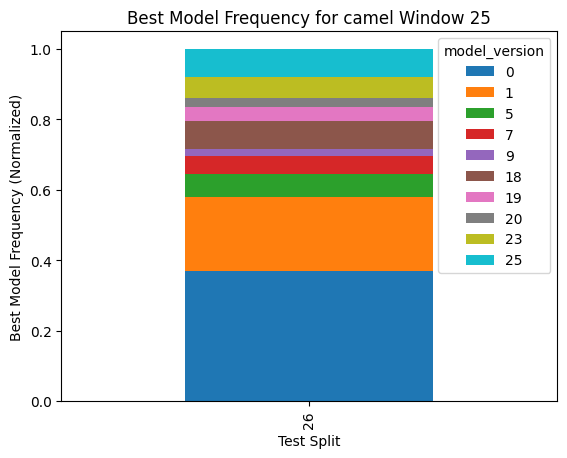

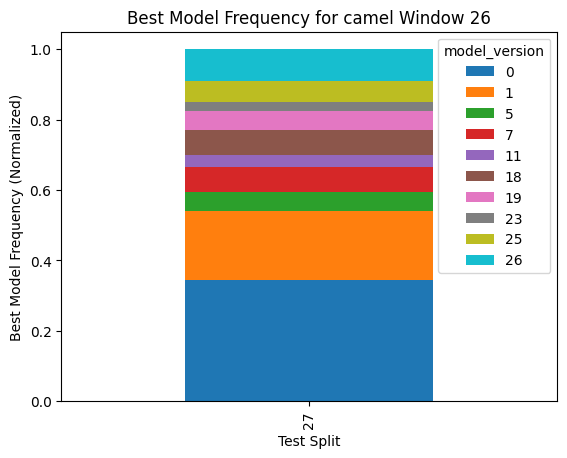

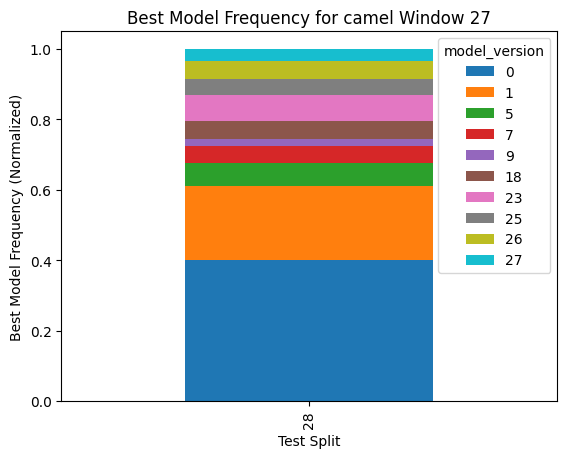

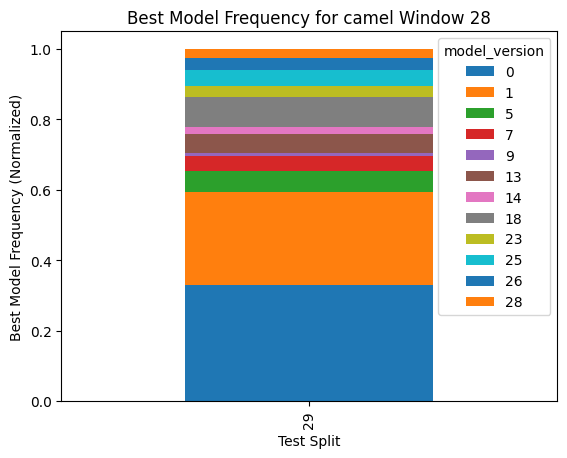

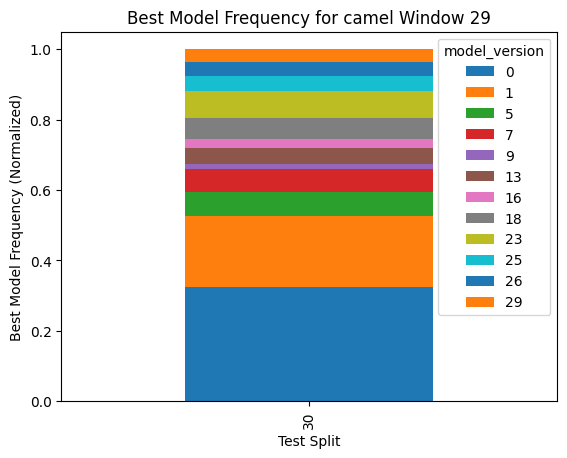

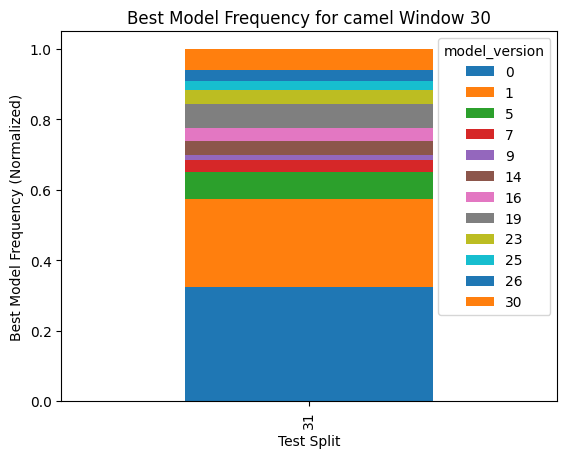

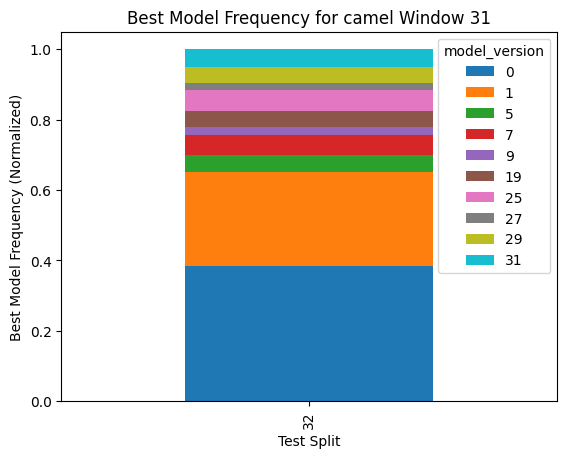

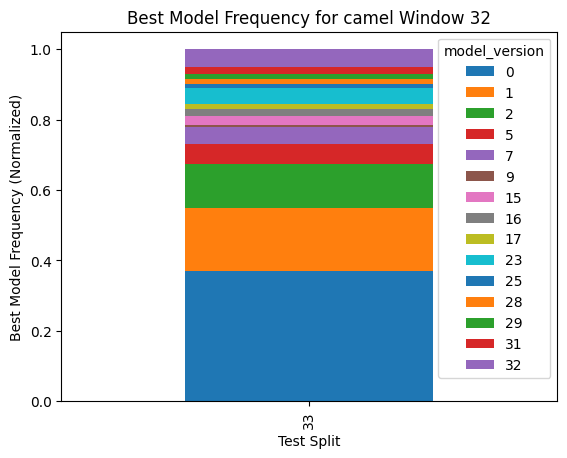

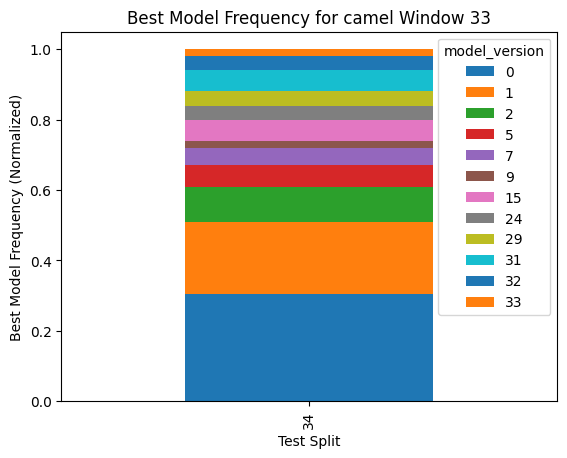

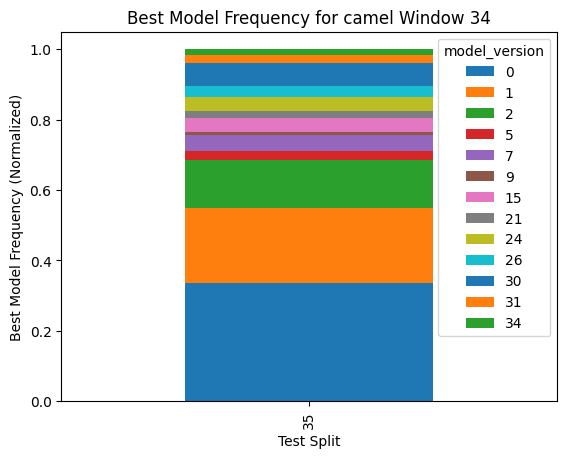

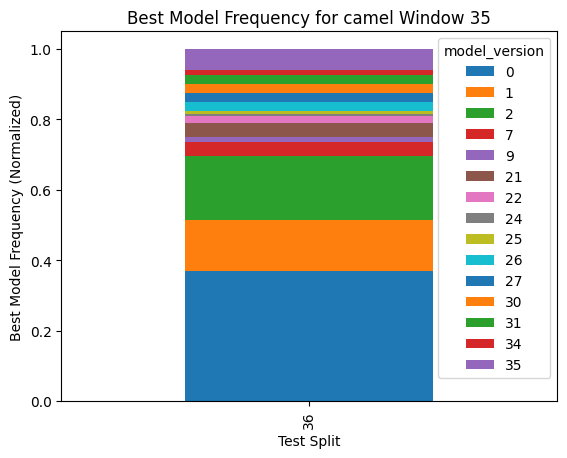

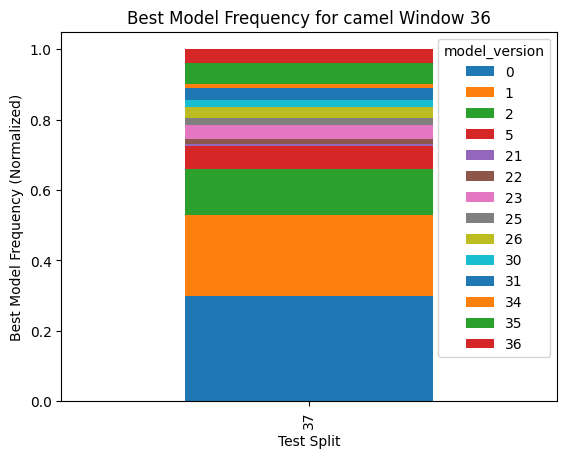

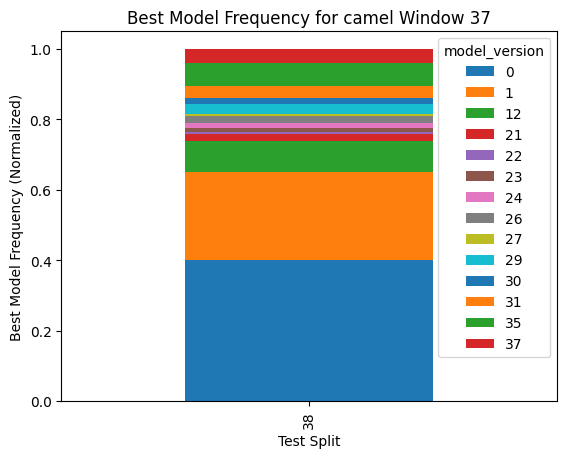

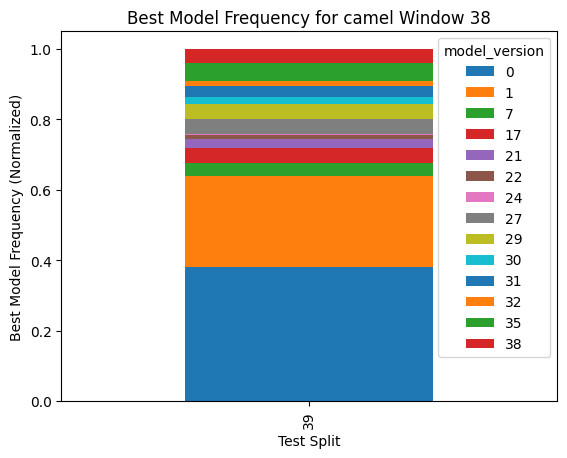

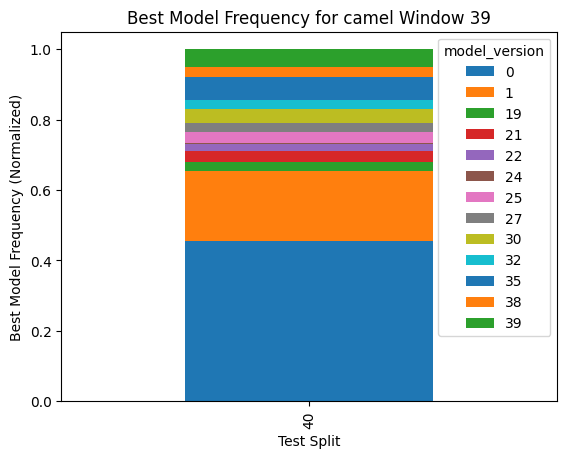

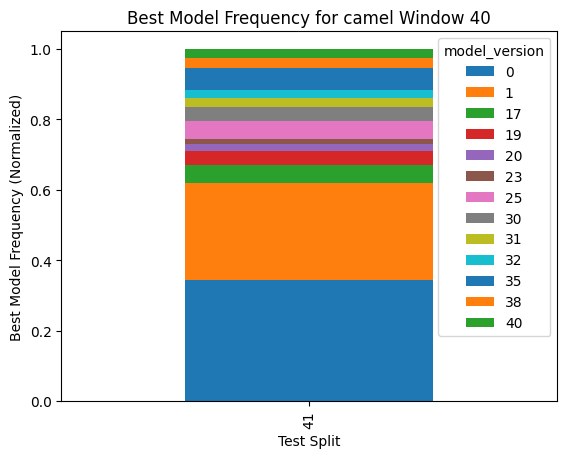

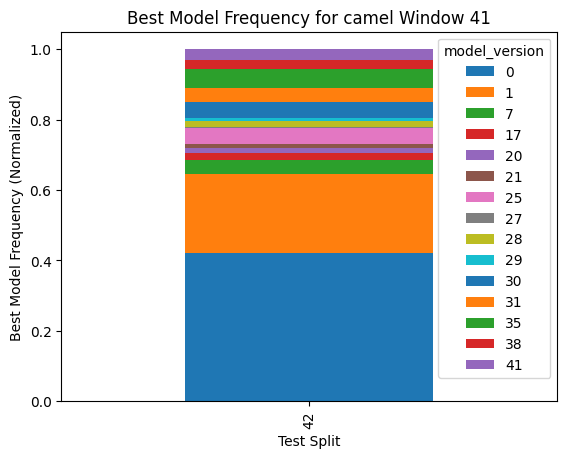

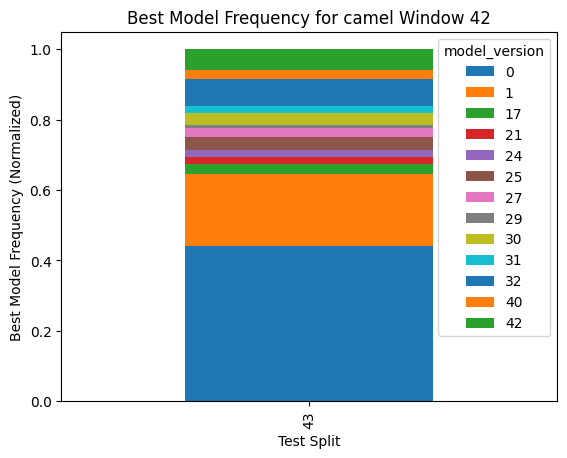

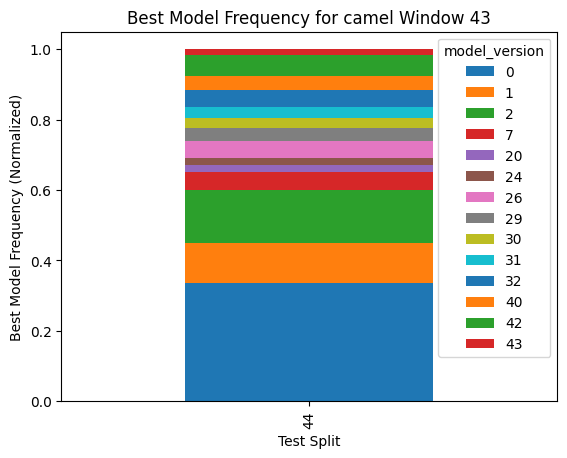

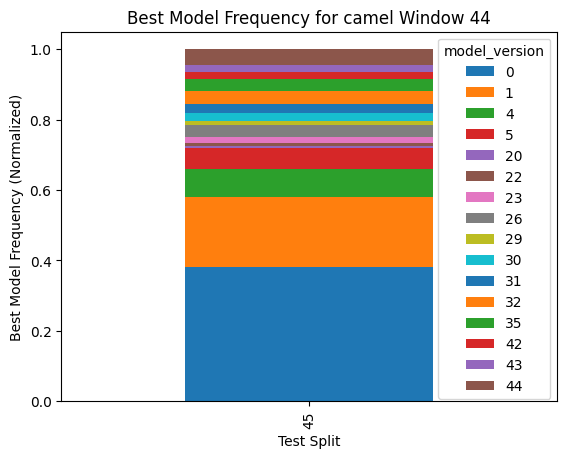

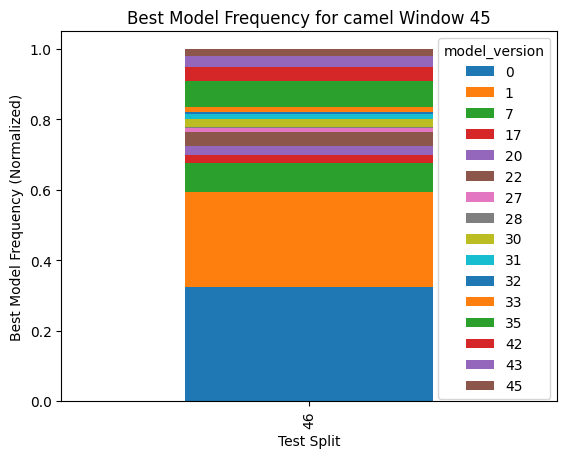

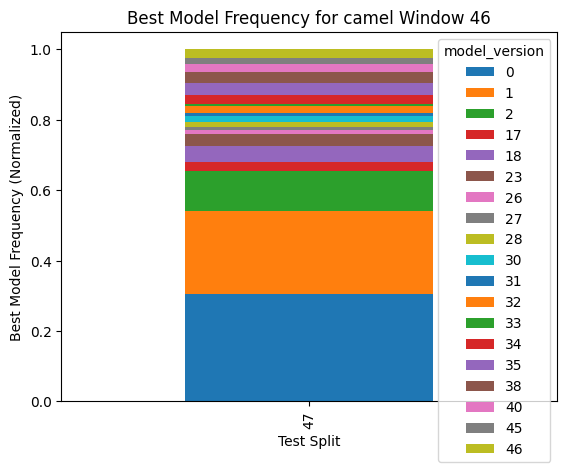

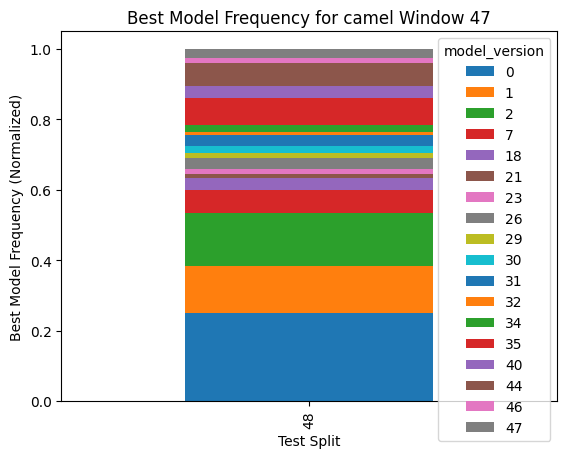

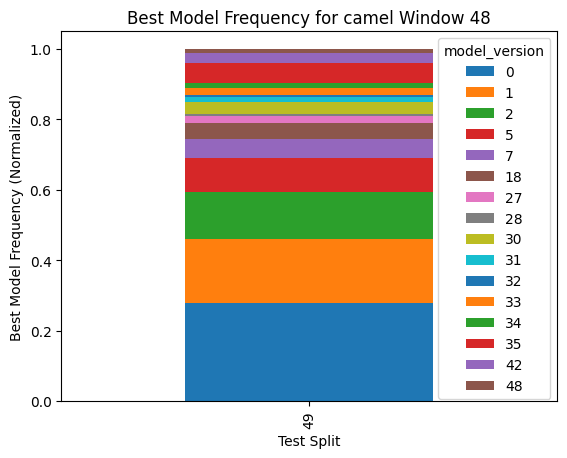

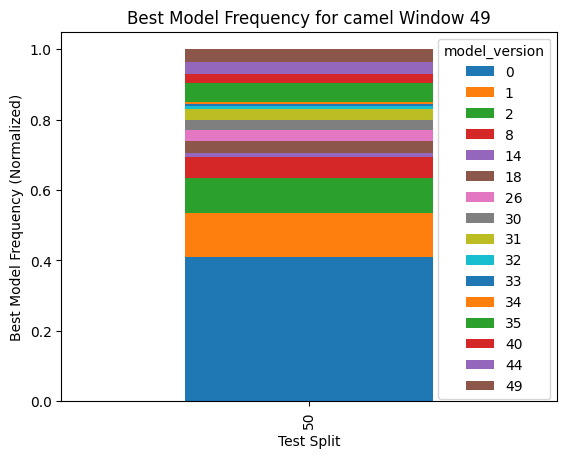

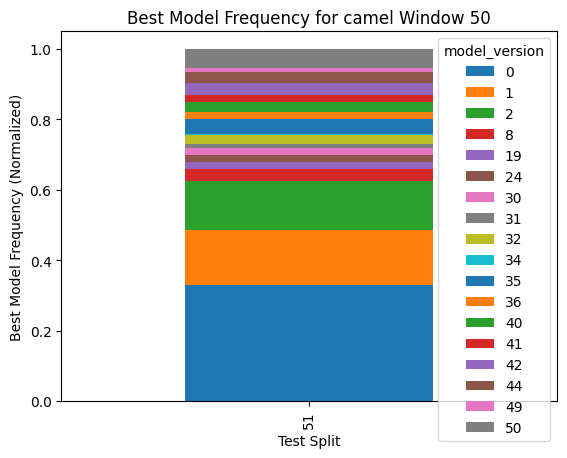

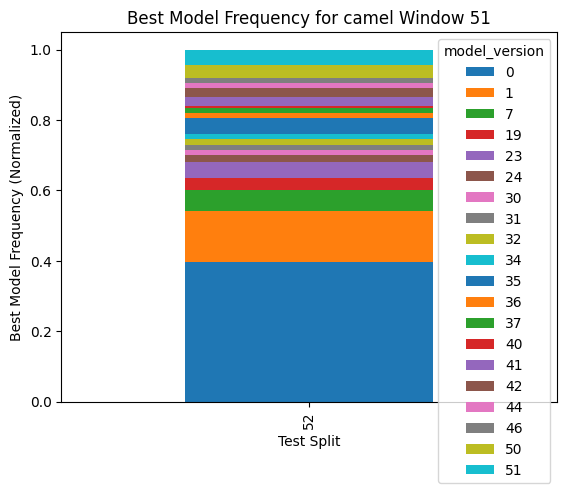

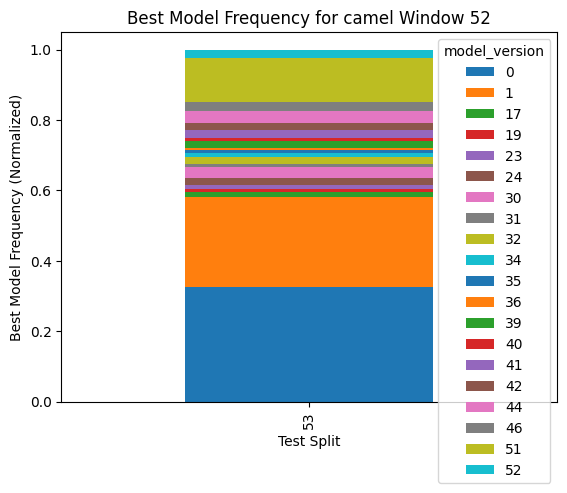

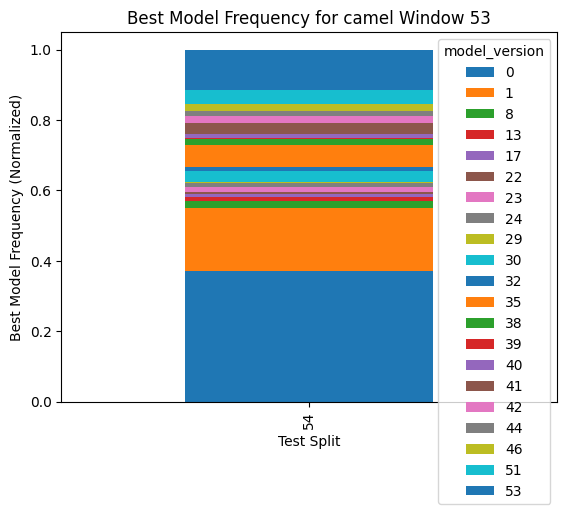

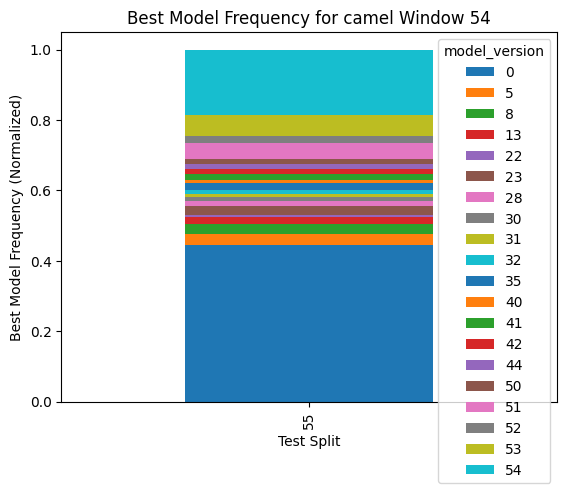

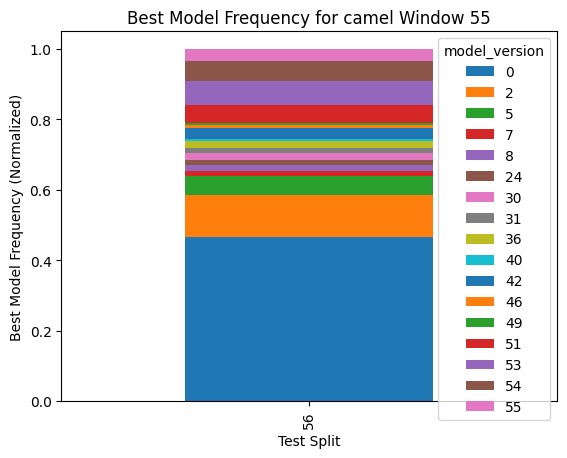

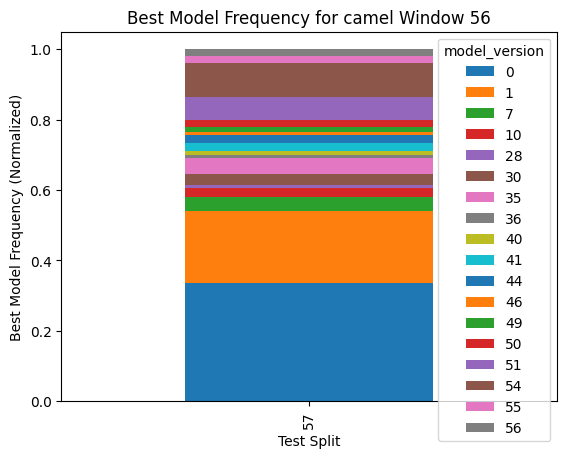

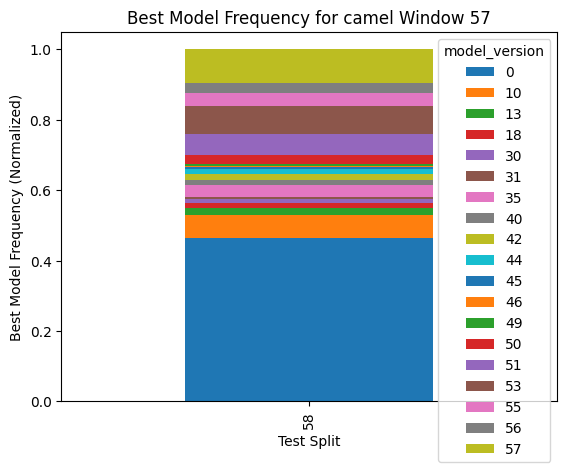

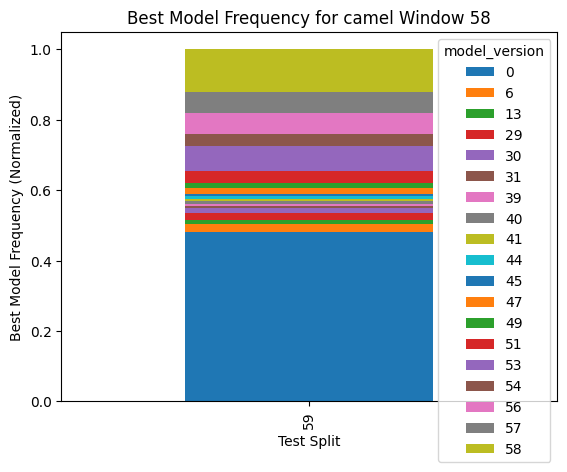

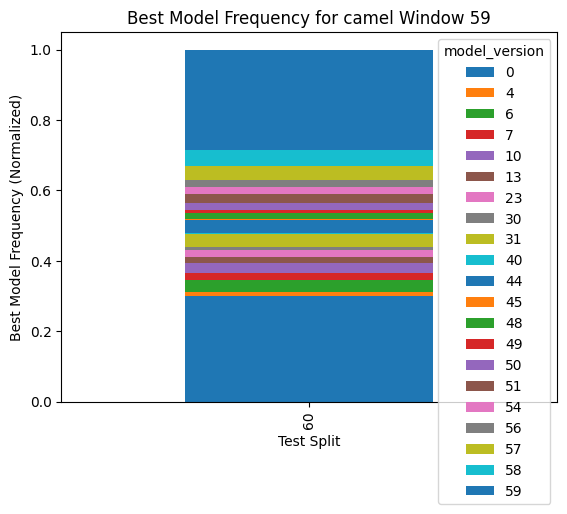

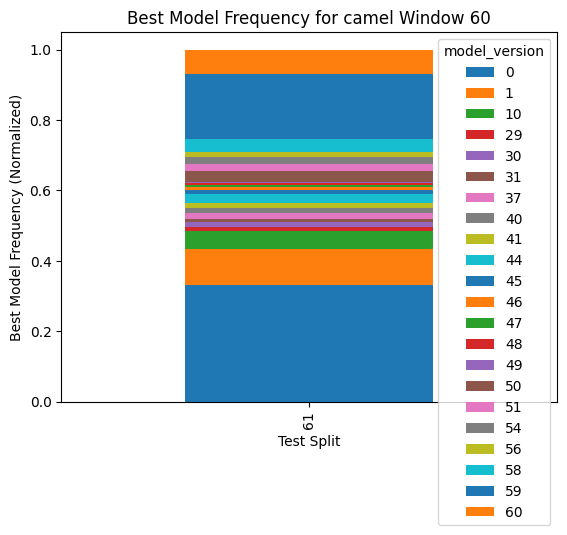

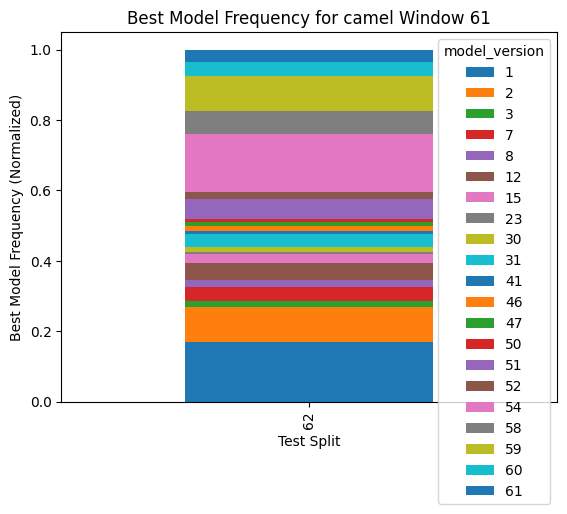

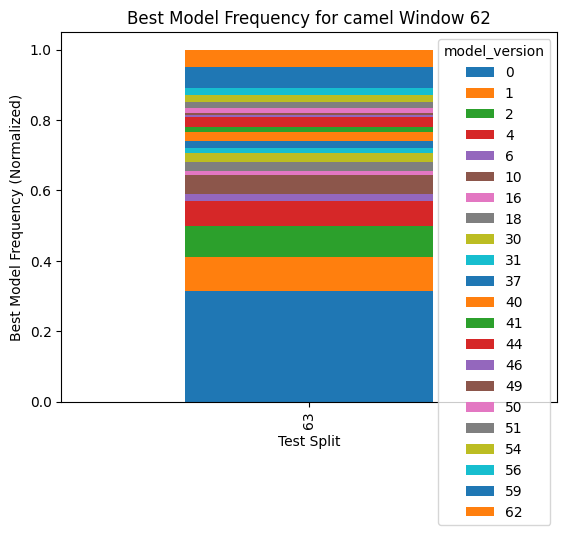

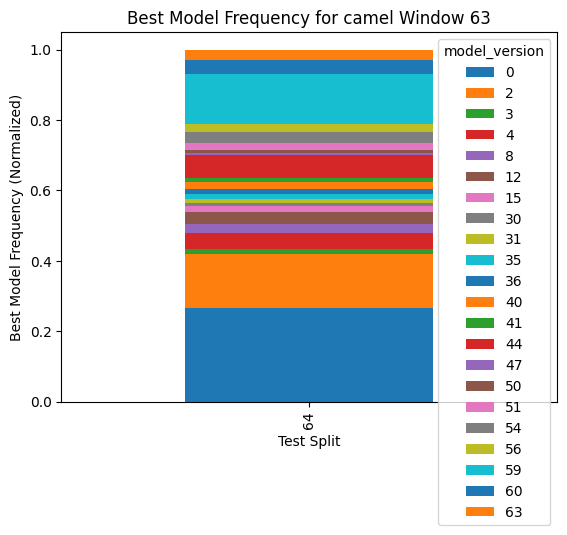

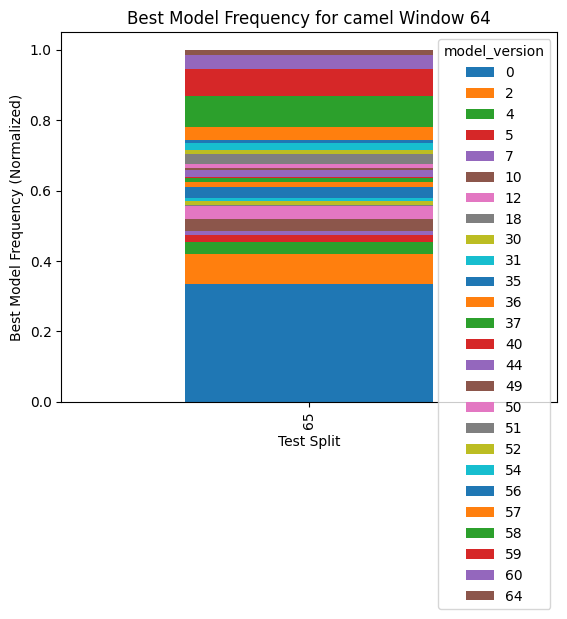

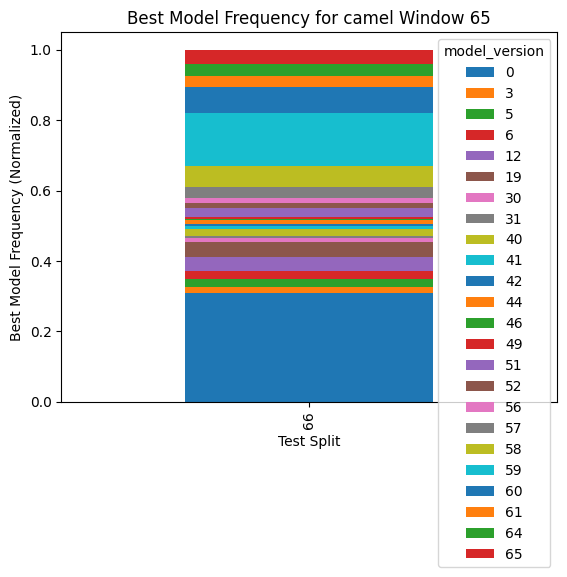

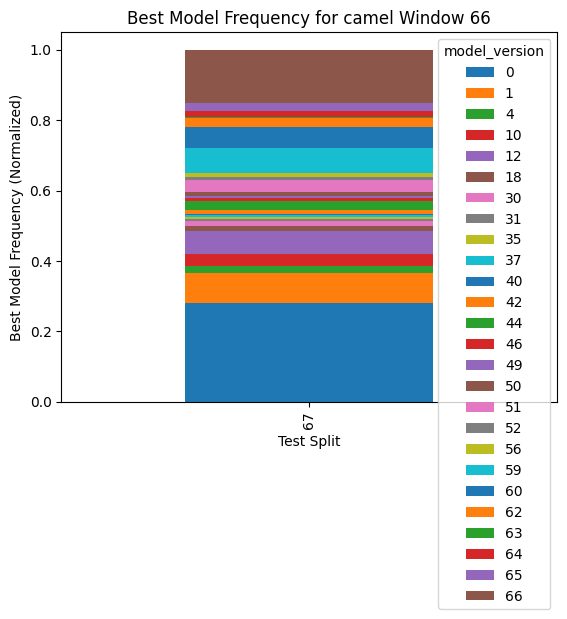

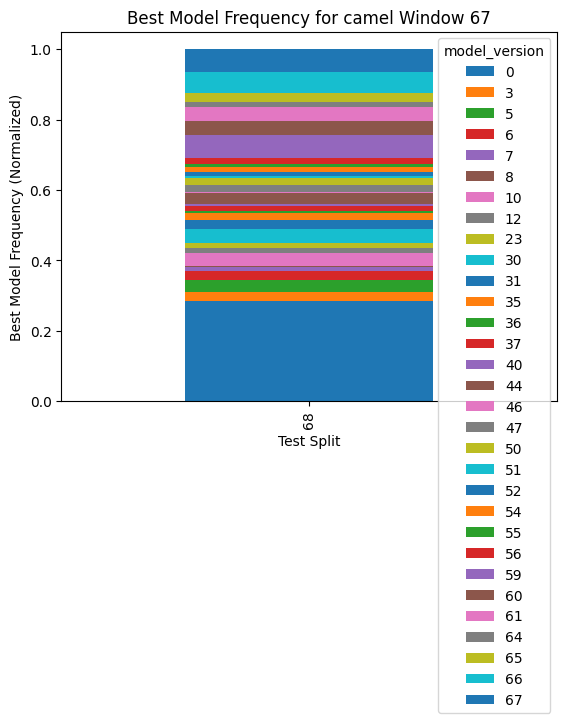

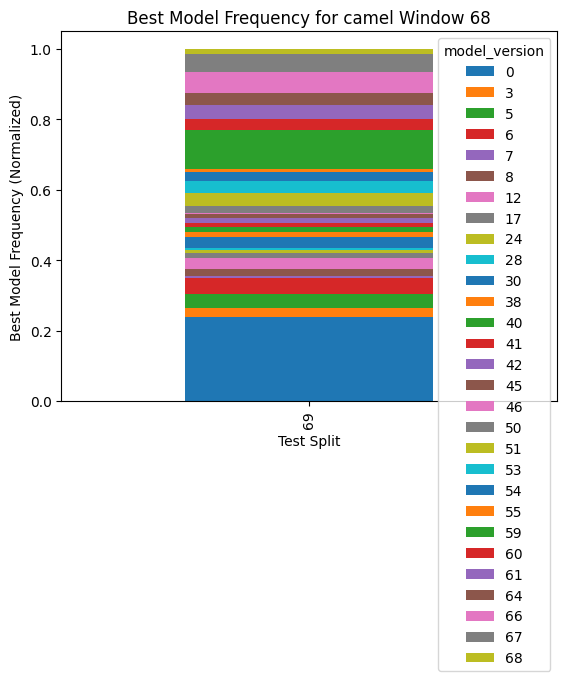

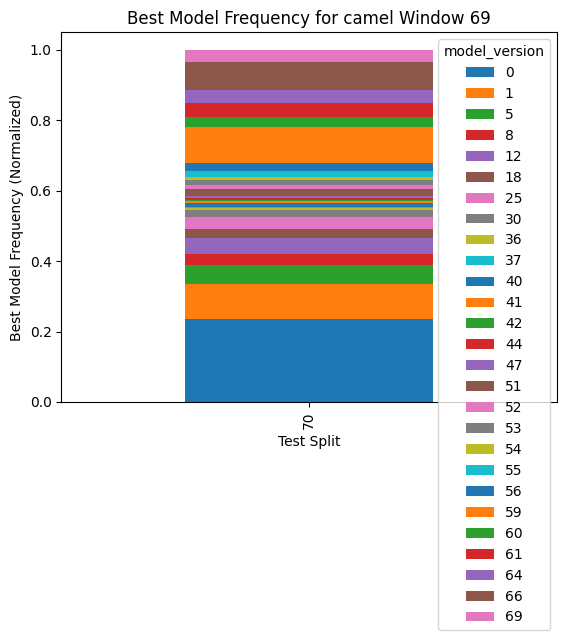

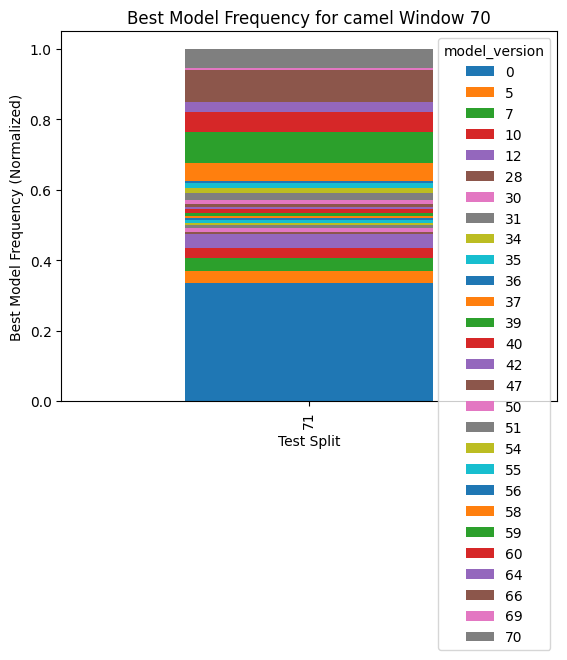

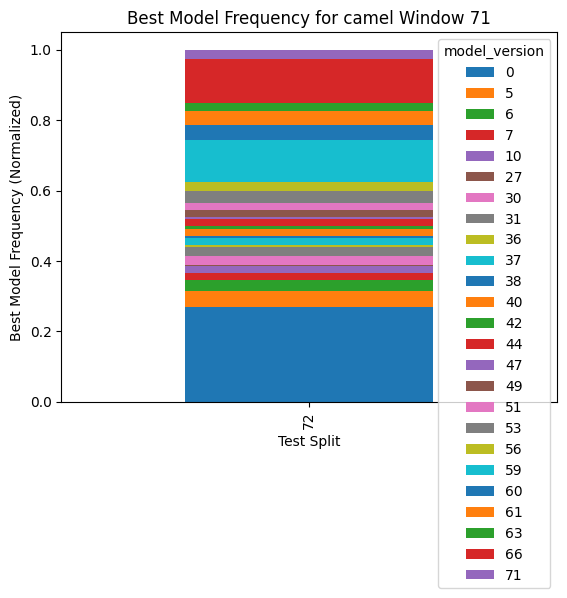

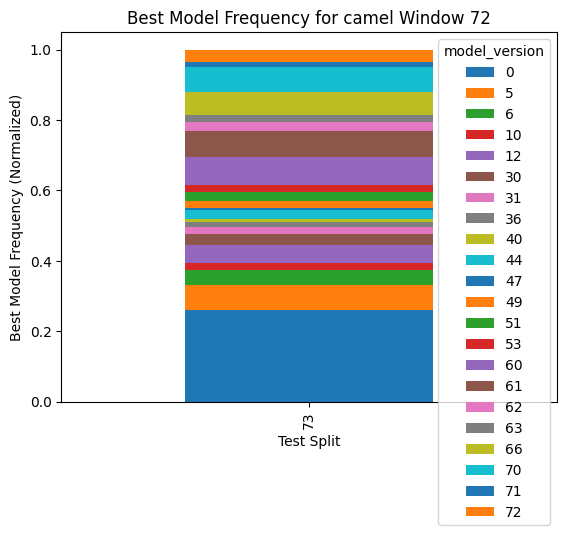

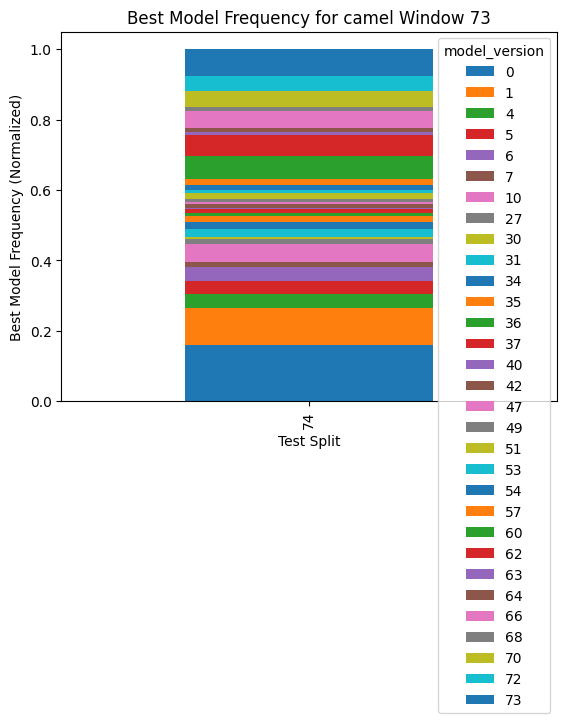

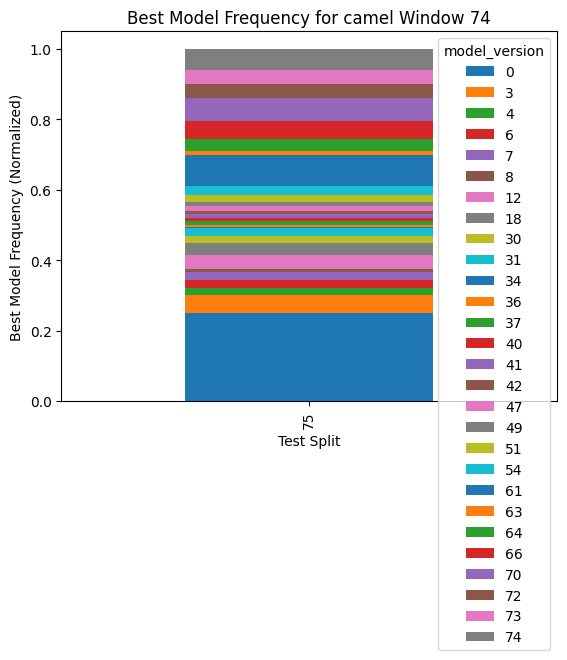

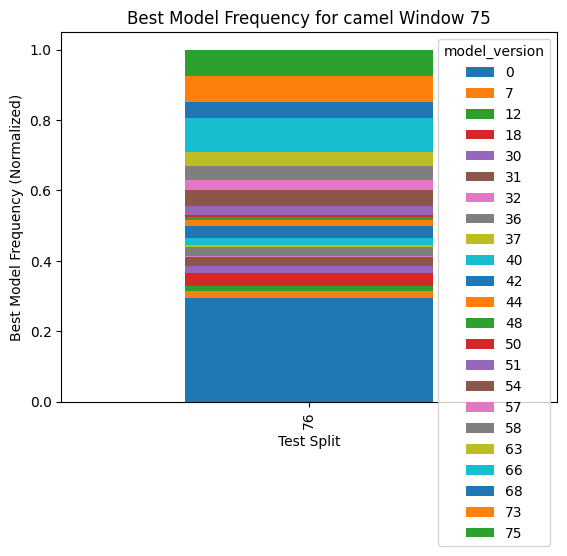

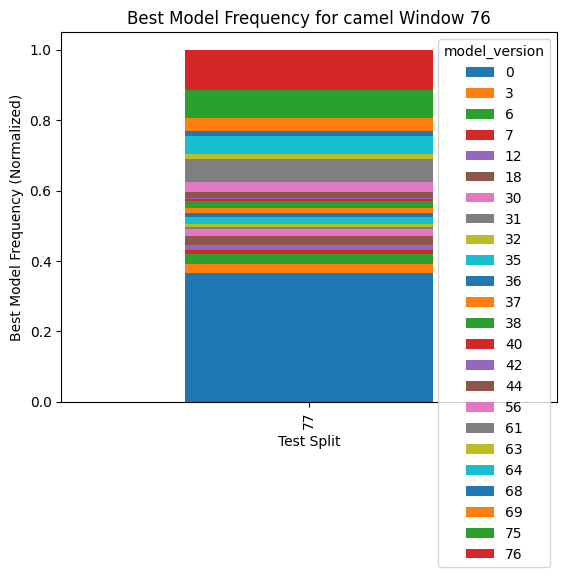

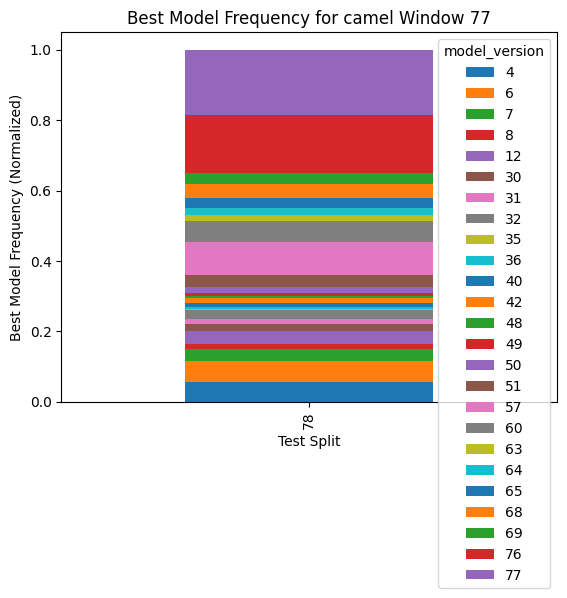

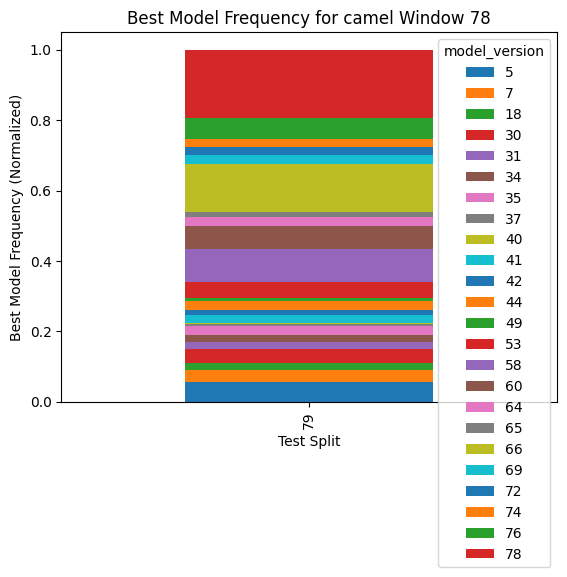

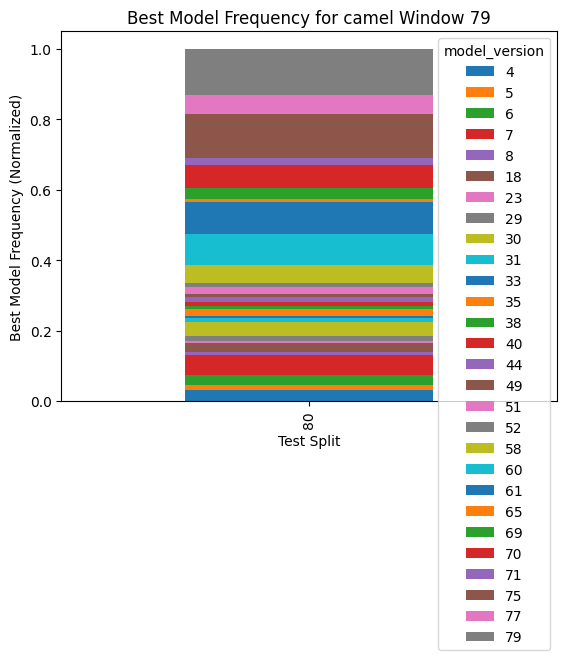

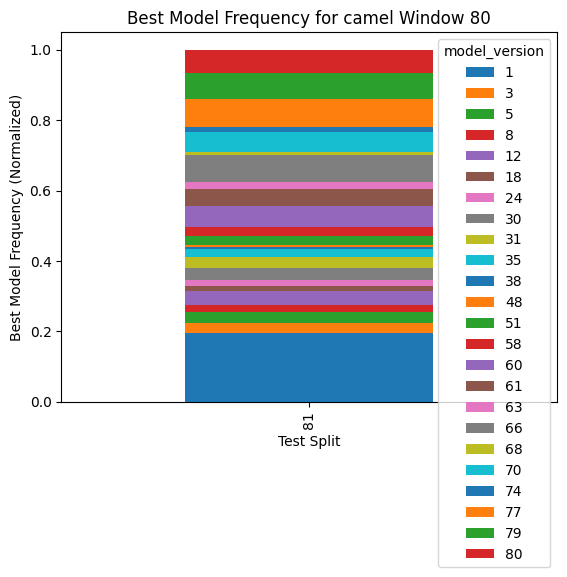

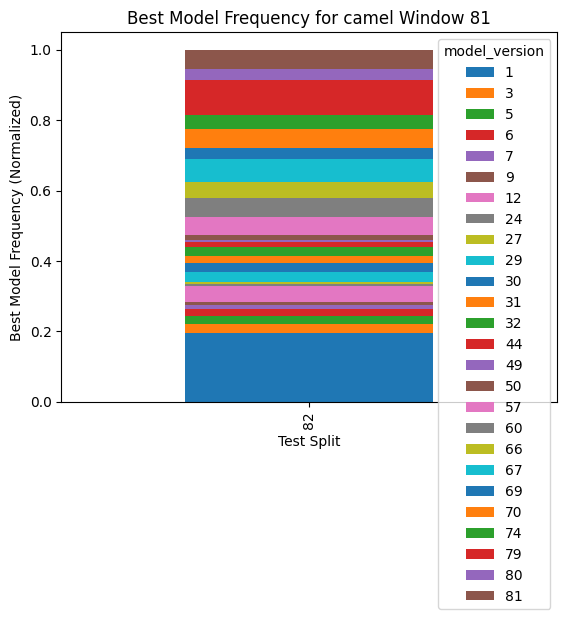

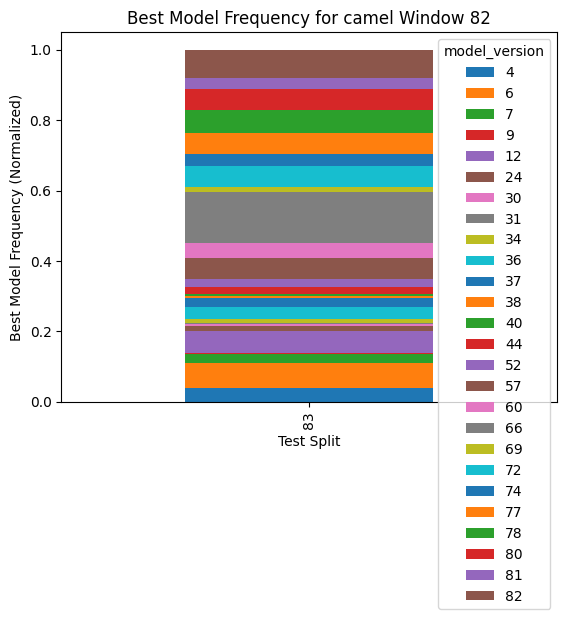

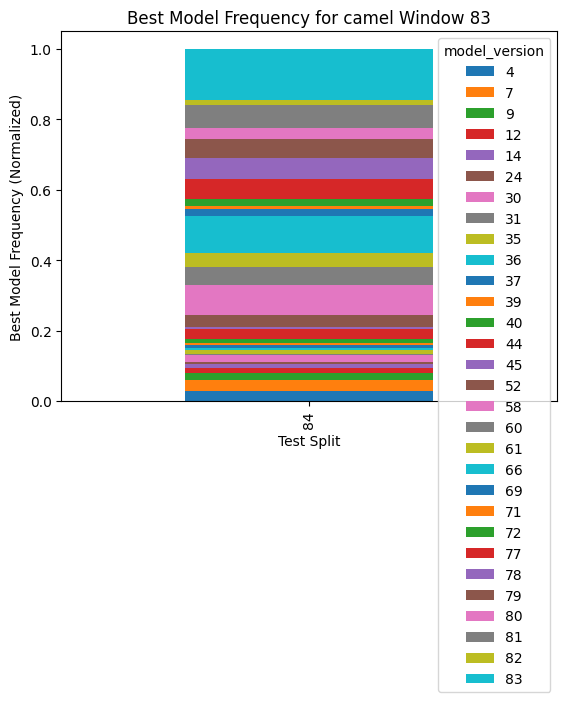

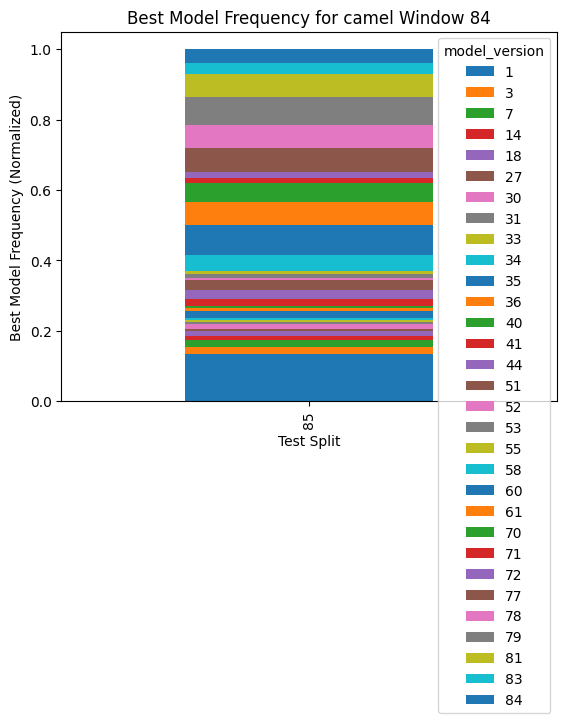

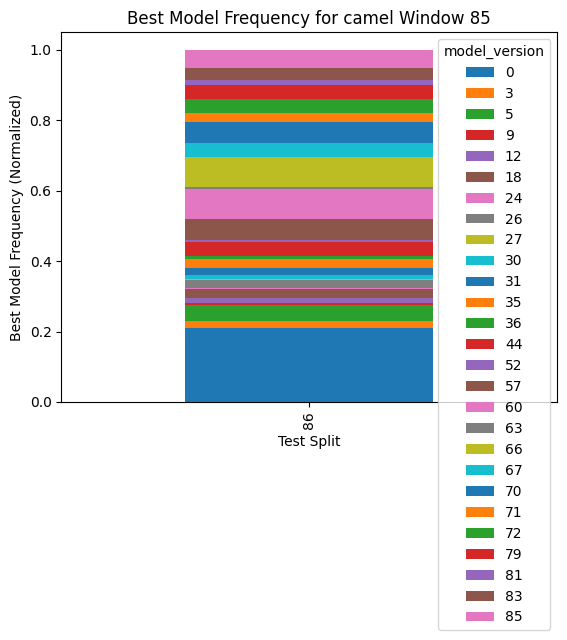

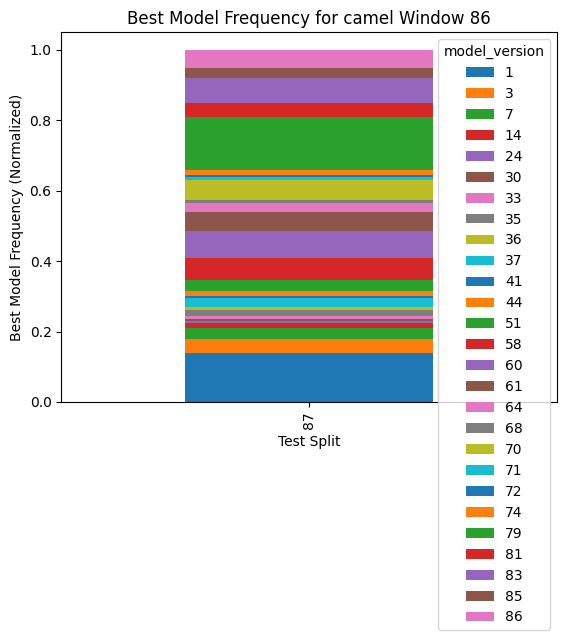

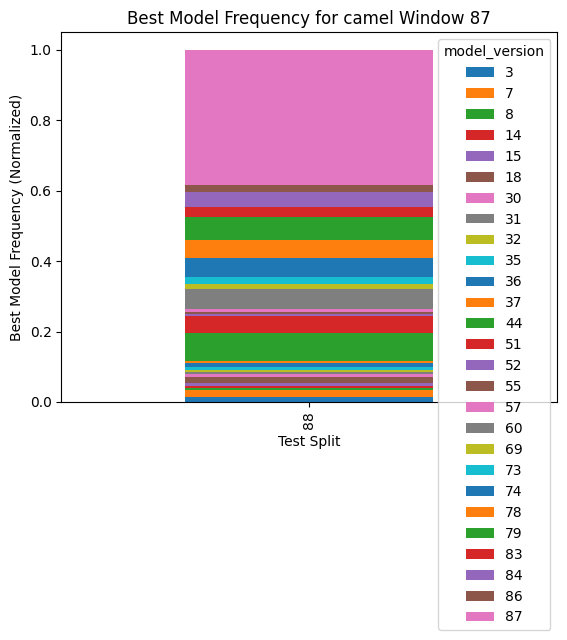

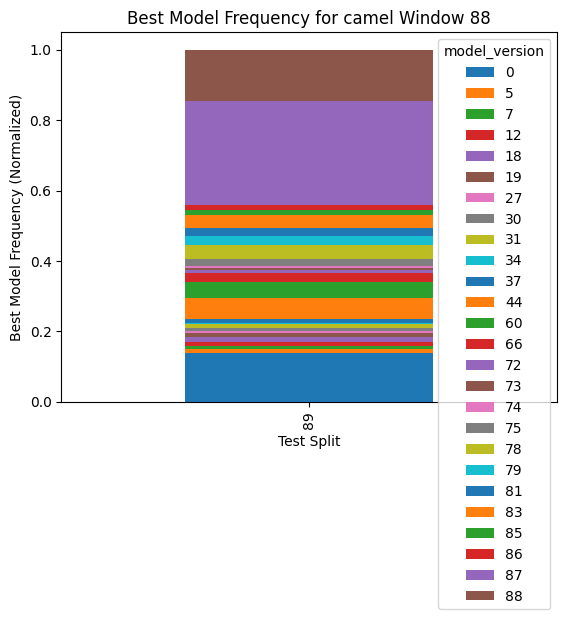

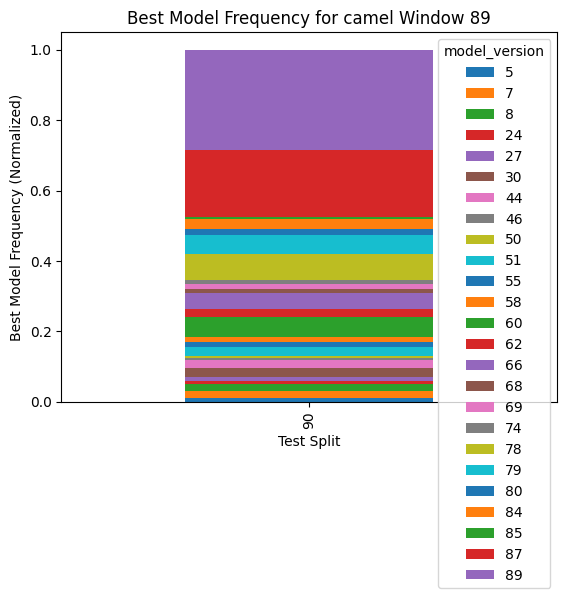

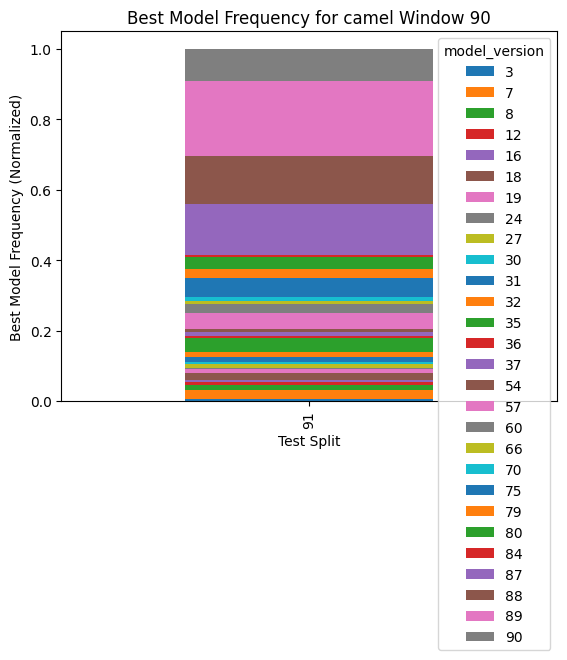

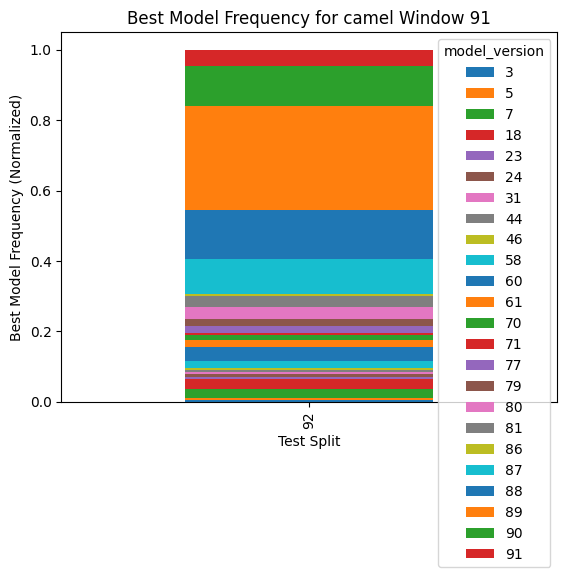

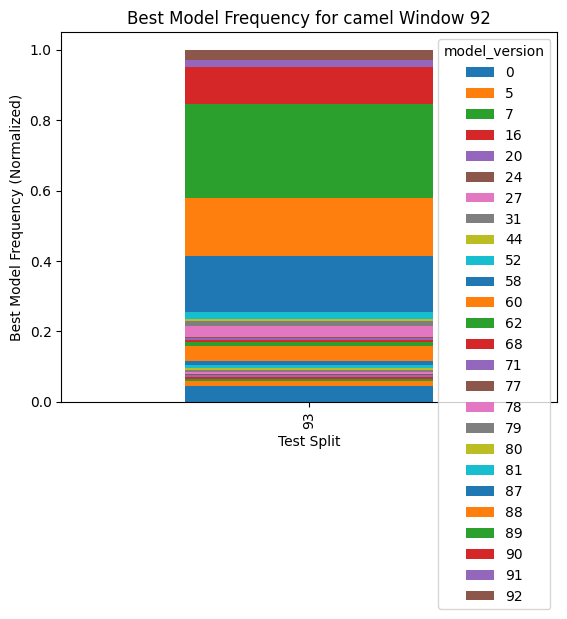

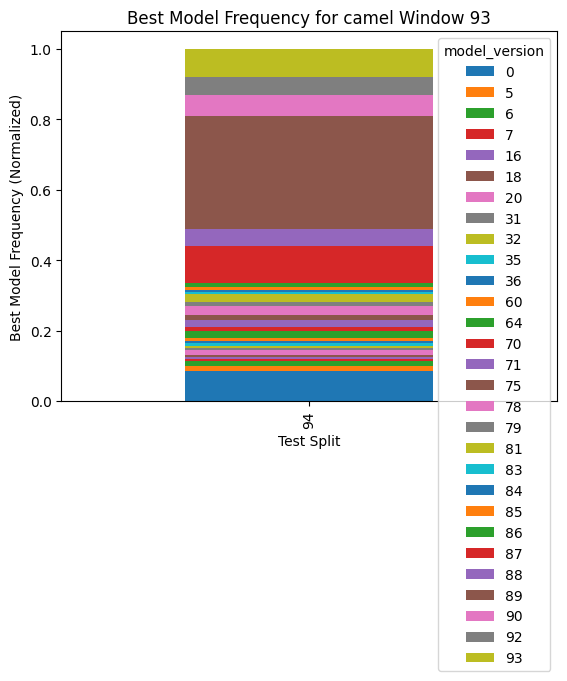

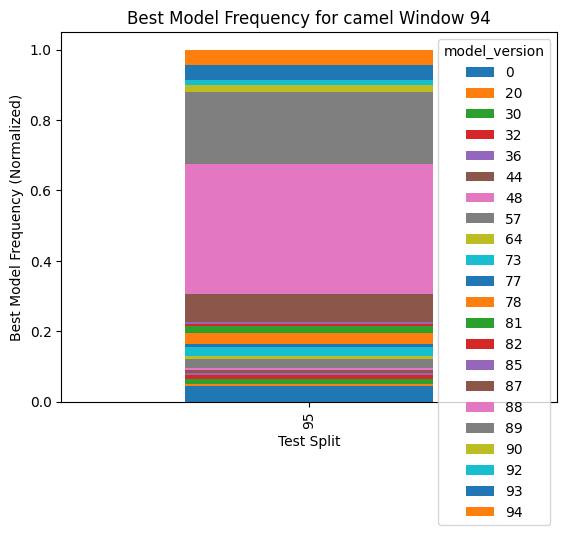

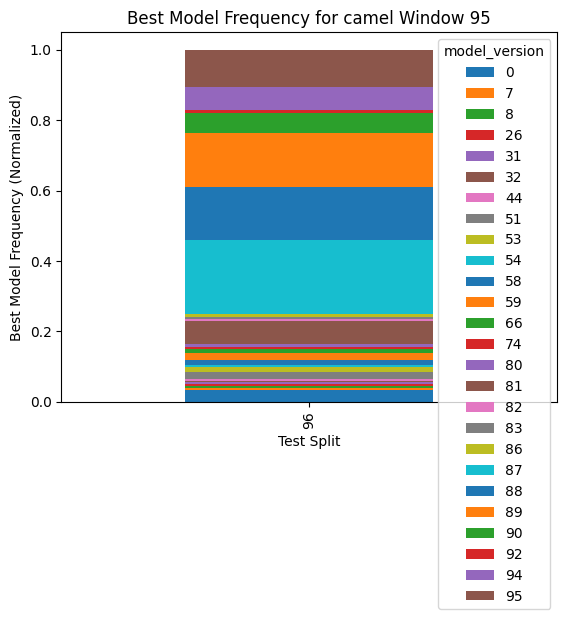

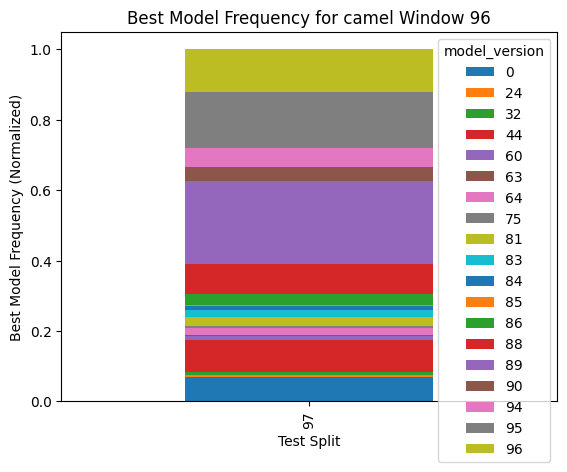

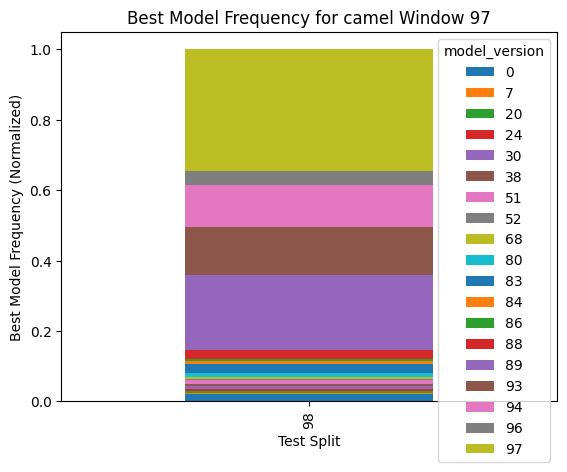

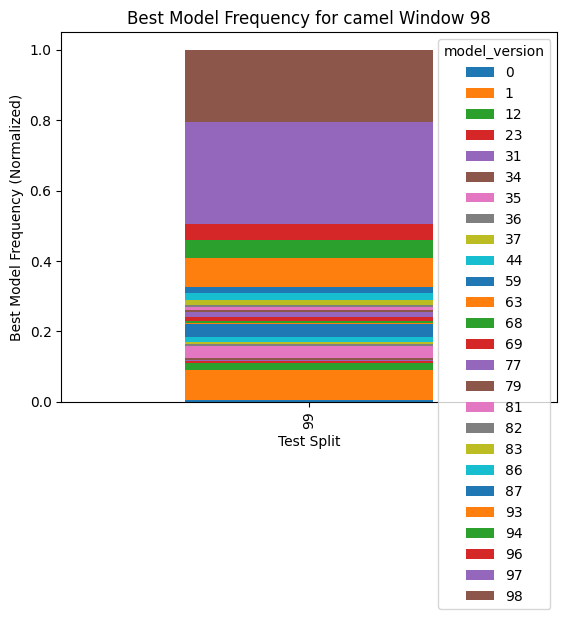

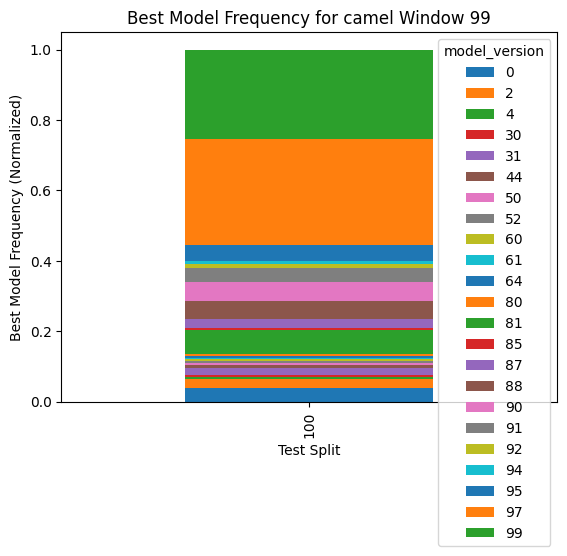

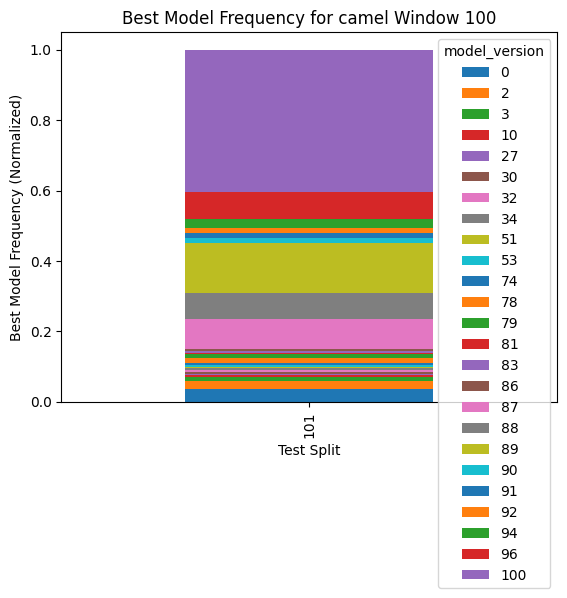

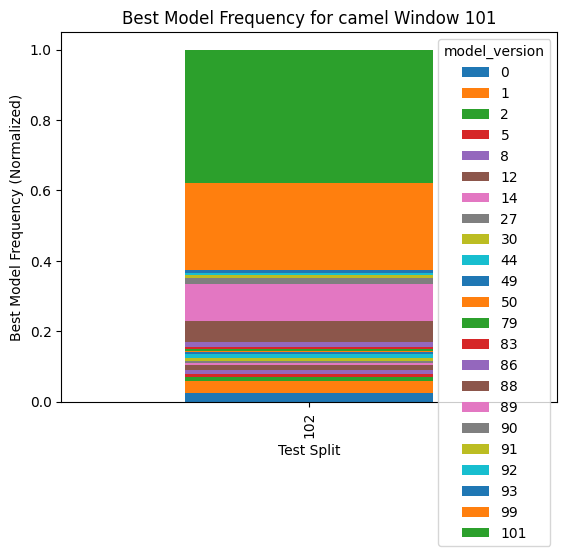

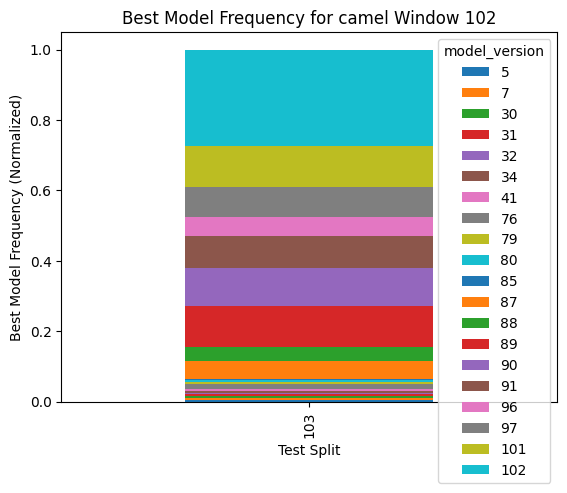

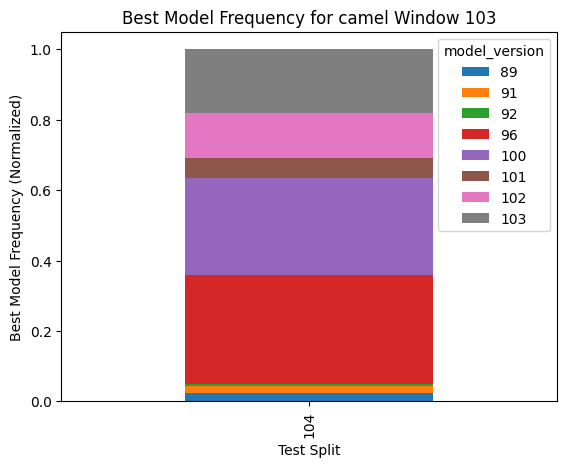

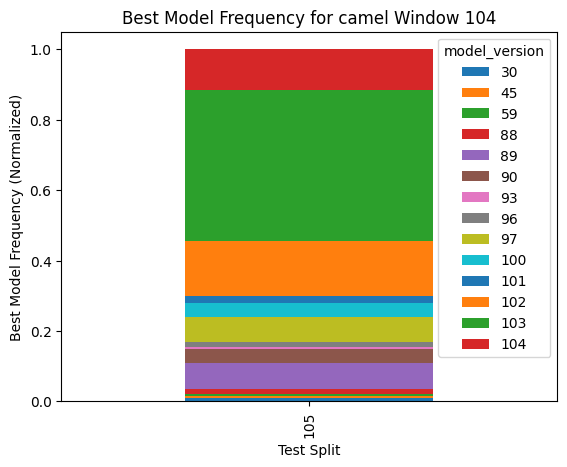

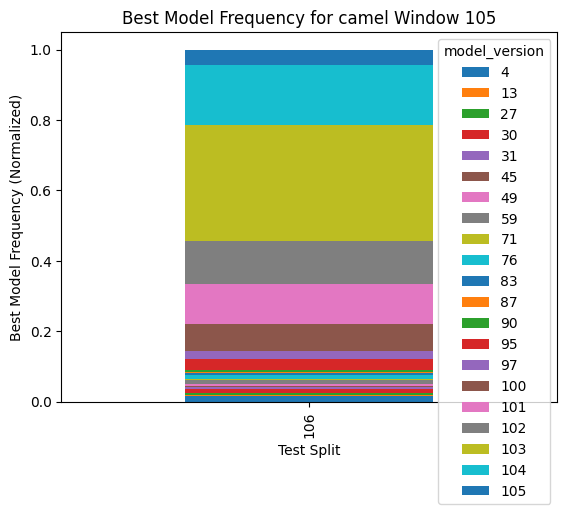

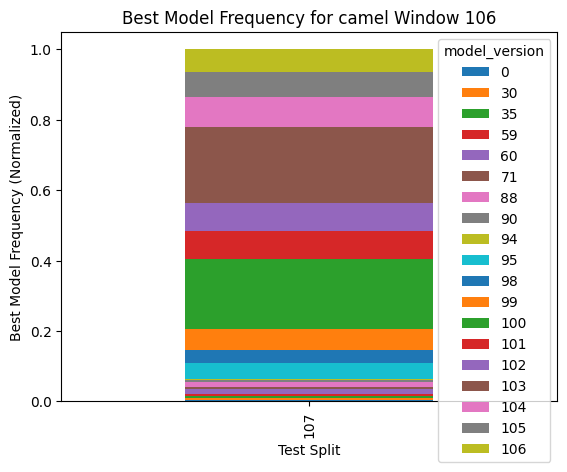

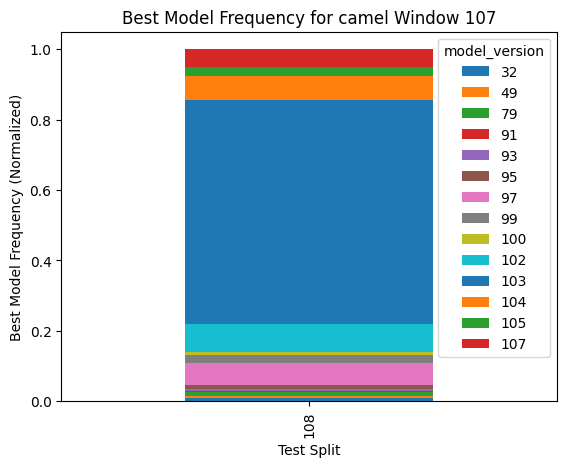

In [12]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")
    plt.show()